<h1> Analisando Cidades </h1>
<hr>

In [259]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import math

## Caracteristicas à serem analisadas

O objetivo desse relatório é analisar a relação entre os dados socioeconomicos, principalmente o crescimento populacional, de pib bruto e per capita, e caracteristicas geograficas dos municípios.
Entre essas caracteristicas:
- [Proximidade do mar](#Proximidade-do-mar)
- [Região MATOPIBA](#MATOPIBA)
- [Região da Amazonia Legal](#Amazônia-Legal)
- [Região do Semi Árido](#Semi-Árido)
- [Região de São Paulo](#São-Paulo)
- [Capitais e Zonas metropolitanas](#Capitais-e-Zonas-metropolitanas)
- [Distância do equador](#Distância-do-equador)
- [Estados e macro-regiões](#Estados-e-macro-regiões)

## Base de dados IBGE

---

<p style="font-size: 20px;">Base de dados reune dados geograficos e socioeconomicos sobre municipios brasileiros com base no IBGE.</p>

- **city_id**: Código da cidade usado no IBGE
- **year**: Anos de 2011 até 2019 que estão atrelados aos dados de PIB, renda per capita e população
- **city_name**: Nome da cidade, para facilitar identificação das cidades
- **state_acronym**: Sigla dos estados para facilitar a identificação das cidades
- **greater_region_name**: Nome da macro-região do país, as quais são Norte, Nordeste, Centro-oeste, sul e sudeste
- **greater_region_code**: Código numérico que representa a macro-região nas planilhas do IBGE
- **metropolitan_region**: Nome da região metropolitana que o municipio esta localizado, se não estiver em região metropolitana estará vazio
- **is_legal_amazon**: Booleano que indica se o município esta na Amazonia Legal
- **is_semi_arid**: Indica se o municipio esta no semi-arido
- **is_sao_paulo_region**: Indica se o município esta na região ao redor da cidade de São Paulo
- **total_gdp_1000_brl**: PIB bruto em milhares de reais
- **gdp_per_capita_brl**: PIB per capita em reais
- **public_expending_value_1000_brl**: Gasto publico em milhares de reais
- **agro_value_1000_brl**: PIB do setor agro em milhares de reais
- **industry_value_1000_brl**: PIB do setor industrial em milhares de reais
- **services_value_1000_brl**: PIB do setor de serviços em milhares de reais
- **taxes_value_1000_brl**: Arrecadação de impostos em milhares de reais
- **most_valueable_sector**: Setor mais importante
- **second_most_valueable_sector**: Segundo setor mais importante
- **gdp_per_capita_brl_growth**: Crescimento do PIB per capita em reais de 2010 à 2019
- **gdp_per_capita_brl_growth_percent**: Crescimento percentual do PIB per capita de 2010 à 2019
- **total_gdp_1000_brl_growth**: Crescimento do PIB em milhares de reais de 2010 à 2019
- **total_gdp_1000_brl_growth_percent**: Crescimento percentual do PIB de 2010 à 2019
- **population_growth**: Crescimento populacional unitário de 2010 à 2021
- **population_growth_percent**: Crescimento percentual da população de 2010 à 2021
- **is_capital**: Booleano que indica se o municipio é uma capital estadual
- **distance_equator_km**: Distancia da linha do equador em quilometros calculado pelas coordenadas de latitude e longitude fornecidas pelo IBGE
- **population2021**: Populaçao unitária dos municípios em 2021
- **is_matopiba**: Booleano que indica se o município esta localizado na região de fronteira agrícola MATOPIBA
- **is_near_coast**: Indica se o municipio está presente na lista de municipios litoraneos do IBGE
- **is_sea_front**: Indica se o municipio está presenta na lista de municípios de frente para o mar do IBGE
---

In [260]:
dados = pd.read_csv('../scrapped-content/full_cities_analysis.csv', sep=',', keep_default_na=False, true_values=["t"], false_values=["f"])

In [261]:
dados.head(2)

,city_id,year,city_name,state_acronym,greater_region_name,greater_region_code,metropolitan_region,is_legal_amazon,is_semi_arid,is_sao_paulo_region,...,total_gdp_1000_brl_growth,total_gdp_1000_brl_growth_percent,population_growth,population_growth_percent,is_capital,distance_equator_km,population2021,is_matopiba,is_near_coast,is_sea_front
0,1100015,2010,Alta Floresta D'Oeste,RO,Norte,1,,True,False,False,...,233552.00,0.89,-1712,-0.07,False,1327,22516,False,False,False
1,1100023,2010,Ariquemes,RO,Norte,1,,True,False,False,...,1214136.00,0.89,19578,0.21,False,1102,111148,False,False,False


---
<p style="font-size: 24px;"> Modificando dados para tipos e criando novas colunas com valor logaritimico, facilitando algumas visualizações. </p>
<hr>

In [382]:
dados['is_metropolitan_region'] = [True if len(x) > 0 else False for x in dados['metropolitan_region']]
category = pd.cut(dados['distance_equator_km'], 
                  bins=[0, 300, 500, 1000, 1500, 2500, 1000000], 
                  labels=['Até 300km','De 300 à 500km','De 500 à 1000km','De 1000 à 1500km', 'De 1500 à 2500km', 'Mais de 2500km'])
dados['distance_equator_category'] = category
category.value_counts()


De 1500 à 2500km    18617
Mais de 2500km      15441
De 500 à 1000km     10370
De 1000 à 1500km     6850
De 300 à 500km       2770
Até 300km            1637
Name: distance_equator_km, dtype: int64

In [383]:
dados['gdp_per_capita_brl_growth'] = pd.to_numeric(dados['gdp_per_capita_brl_growth'], errors='coerce')
dados['gdp_per_capita_brl_growth_percent'] = pd.to_numeric(dados['gdp_per_capita_brl_growth_percent'], errors='coerce')
dados['total_gdp_1000_brl_growth'] = pd.to_numeric(dados['total_gdp_1000_brl_growth'], errors='coerce')
dados['total_gdp_1000_brl_growth_percent'] = pd.to_numeric(dados['total_gdp_1000_brl_growth_percent'], errors='coerce')
dados['population2021'] = pd.to_numeric(dados['population2021'], errors='coerce')
dados['population_growth'] = pd.to_numeric(dados['population_growth'], errors='coerce')
dados['population_growth_percent'] = pd.to_numeric(dados['population_growth_percent'], errors='coerce')
dados['log_gdp_per_capita'] = np.log(dados['gdp_per_capita_brl'])
dados['total_gdp_1000_brl_growth_percent_log'] = np.log(dados['total_gdp_1000_brl_growth_percent'] + 0.00001)
dados.head(2)

C:\Users\plini\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,city_id,year,city_name,state_acronym,greater_region_name,greater_region_code,metropolitan_region,is_legal_amazon,is_semi_arid,is_sao_paulo_region,...,distance_equator_km,population2021,is_matopiba,is_near_coast,is_sea_front,is_metropolitan_region,log_gdp_per_capita,total_gdp_1000_brl_growth_percent_log,distance_equador_groups,distance_equator_category
0,1100015,2010,Alta Floresta D'Oeste,RO,Norte,1,,True,False,False,...,1327,22516.0,False,False,False,False,9.280909,-0.116523,NaN,De 1000 à 1500km
1,1100023,2010,Ariquemes,RO,Norte,1,,True,False,False,...,1102,111148.0,False,False,False,False,9.622706,-0.116523,NaN,De 1000 à 1500km


### Recortes

- Ano de 2019
- Cidades com mais de 100 mil habitantes

---

In [385]:
dados_2019 = dados[dados.year == 2019]
dados_2019.shape

(5570, 36)

In [386]:
dados_2019_100k_cities = dados_2019[dados_2019.population2021 > 100000]
dados_2019_100k_cities.shape

(326, 36)

In [266]:
dados.describe().round(2)

,city_id,year,greater_region_code,total_gdp_1000_brl,gdp_per_capita_brl,public_expending_value_1000_brl,agro_value_1000_brl,industry_value_1000_brl,services_value_1000_brl,taxes_value_1000_brl,gdp_per_capita_brl_growth,gdp_per_capita_brl_growth_percent,total_gdp_1000_brl_growth,total_gdp_1000_brl_growth_percent,population_growth,population_growth_percent,distance_equator_km,population2021,log_gdp_per_capita,total_gdp_1000_brl_growth_percent_log
count,55685.00,55685.00,55685.00,5.568500e+04,55685.00,5.568500e+04,55685.00,55685.00,5.568500e+04,5.568500e+04,55650.00,55650.00,5.565000e+04,55650.00,55650.00,55650.00,55685.00,55650.00,55685.00,54960.00
mean,3253429.67,2014.50,2.90,1.031363e+06,18961.03,1.496661e+05,45431.24,207058.93,4.829187e+05,1.467619e+05,11931.98,1.11,6.292860e+05,1.24,3753.80,0.07,1832.67,38323.30,9.55,0.06
std,984714.21,2.87,1.09,1.042699e+07,21034.77,1.391605e+06,81787.85,1333025.07,6.410927e+06,1.907779e+06,17159.18,1.21,5.379799e+06,1.31,21240.83,0.11,917.96,224369.07,0.73,0.63
min,1100015.00,2010.00,1.00,4.199000e+03,301.60,4.227000e+03,0.00,99.00,1.207000e+03,2.100000e+01,-189026.02,-0.81,-9.586758e+06,-0.78,-28162.00,-0.76,3.00,771.00,5.71,-11.51
25%,2512101.00,2012.00,2.00,6.326900e+04,7999.42,2.113700e+04,8731.00,3221.00,1.488300e+04,2.437000e+03,4715.62,0.74,4.023300e+04,0.85,69.00,0.01,945.00,5453.00,8.99,-0.15
50%,3146255.00,2015.00,3.00,1.410570e+05,13591.61,4.044700e+04,21816.00,10180.00,3.882600e+04,7.359000e+03,7914.89,1.00,9.620600e+04,1.11,613.00,0.06,2014.00,11733.00,9.52,0.10
75%,4119152.00,2017.00,4.00,3.816070e+05,23197.00,8.765500e+04,49489.00,56445.00,1.246540e+05,2.820100e+04,14613.71,1.28,2.611710e+05,1.39,2240.00,0.12,2542.00,25771.00,10.05,0.33
max,5300108.00,2019.00,5.00,7.638060e+08,815697.76,1.072192e+08,2482542.00,66893050.00,5.283801e+08,1.324779e+08,414783.71,37.90,3.133140e+08,42.67,1080253.00,0.88,3749.00,12396372.00,13.61,3.75


## Proximidade do mar

---

In [437]:
dados_2019_sea_front_growth = dados_2019[['is_sea_front', 'total_gdp_1000_brl_growth_percent', 'population_growth_percent', 'gdp_per_capita_brl']].copy()
dados_2019_sea_front_growth_means = dados_2019_sea_front_growth.groupby('is_sea_front', as_index=False).mean().sort_values(by=['population_growth_percent'], ascending=False)
dados_2019_sea_front_growth_means

,is_sea_front,total_gdp_1000_brl_growth_percent,population_growth_percent,gdp_per_capita_brl
1,True,1.692590,0.141583,32106.861075
0,False,1.211318,0.063768,24148.158675


<AxesSubplot:title={'center':'PIB per capita dos municípios de frente ao mar'}, xlabel='É Defrontante com o mar?', ylabel='%'>

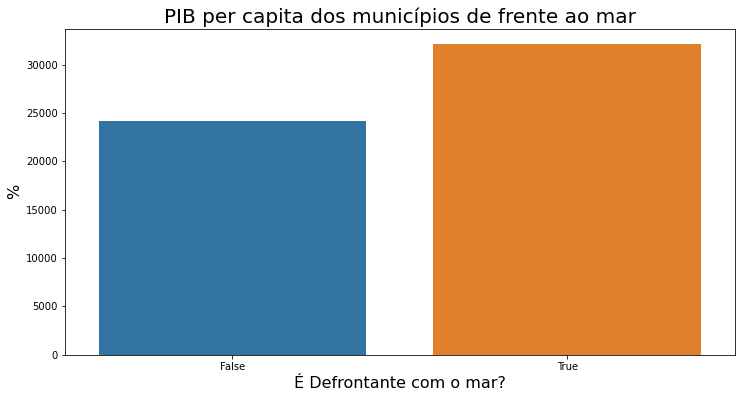

In [438]:
ax = sns.barplot(data=dados_2019_sea_front_growth_means, x='is_sea_front', y="gdp_per_capita_brl", orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('PIB per capita dos municípios de frente ao mar', fontsize=20)
ax.set_ylabel('PIB per capita R$', fontsize=16)
ax.set_xlabel('É Defrontante com o mar?', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento populacional nos municípios de frente ao mar'}, xlabel='É Defrontante com o mar?', ylabel='%'>

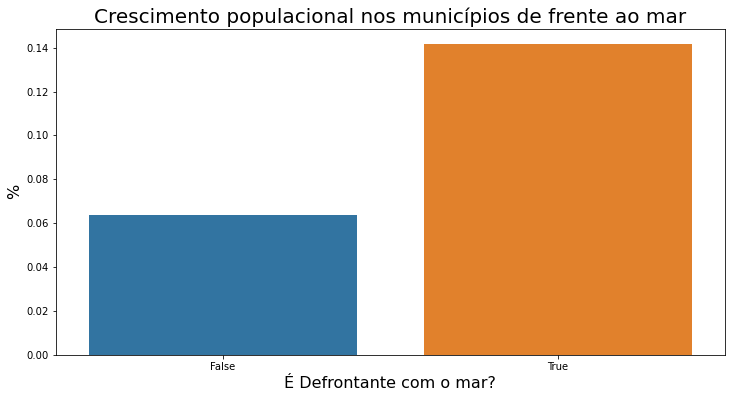

In [419]:
ax = sns.barplot(data=dados_2019_sea_front_growth_means, x='is_sea_front', y="population_growth_percent", orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento populacional nos municípios de frente ao mar', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É Defrontante com o mar?', fontsize=16)
ax

In [440]:
dados_2019_near_coast_growth = dados_2019[['is_near_coast', 'total_gdp_1000_brl_growth_percent', 'population_growth_percent', 'gdp_per_capita_brl']].copy()
dados_2019_near_coast_growth_means = dados_2019_near_coast_growth.groupby('is_near_coast', as_index=False).mean().sort_values(by=['population_growth_percent'], ascending=False)
dados_2019_near_coast_growth_means

,is_near_coast,total_gdp_1000_brl_growth_percent,population_growth_percent,gdp_per_capita_brl
1,True,1.487279,0.130159,28329.252235
0,False,1.213679,0.062276,24219.984991


<AxesSubplot:title={'center':'PIB per capita dos municípios perto do mar'}, xlabel='É perto do mar?', ylabel='PIB per capita R$'>

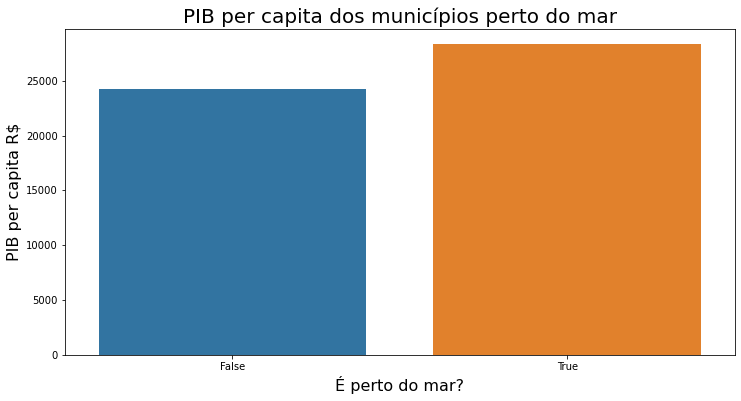

In [442]:
ax = sns.barplot(data=dados_2019_near_coast_growth_means, x='is_near_coast', y="gdp_per_capita_brl", orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('PIB per capita dos municípios perto do mar', fontsize=20)
ax.set_ylabel('PIB per capita R$', fontsize=16)
ax.set_xlabel('É perto do mar?', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento populacional nos municípios pertos do mar'}, xlabel='É perto do mar?', ylabel='%'>

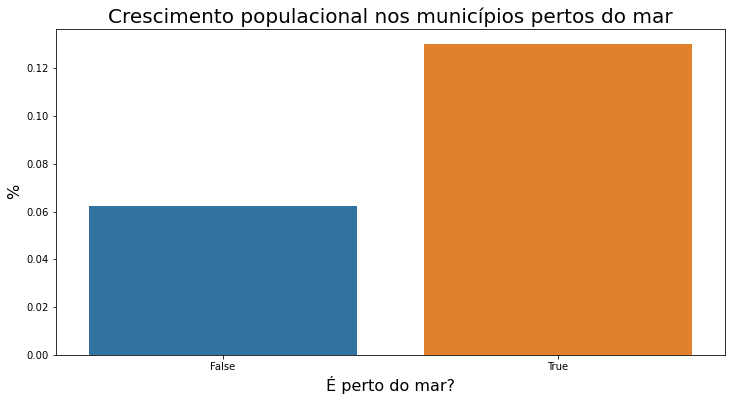

In [422]:
ax = sns.barplot(data=dados_2019_near_coast_growth_means, x='is_near_coast', y="population_growth_percent", orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento populacional nos municípios pertos do mar', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É perto do mar?', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento do PIB nos municípios de frente ao mar'}, xlabel='É Defrontante com o mar?', ylabel='%'>

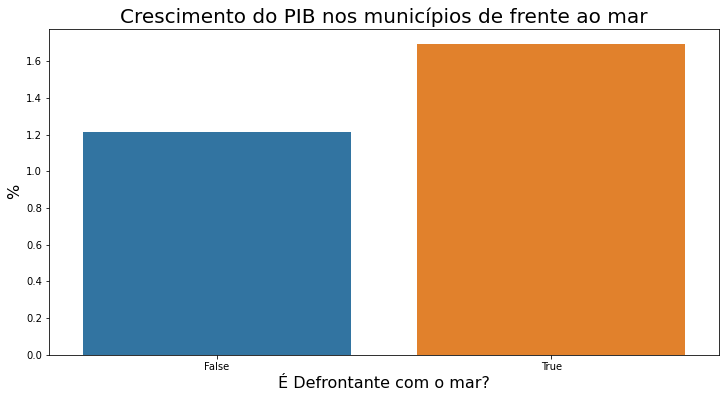

In [420]:
ax = sns.barplot(data=dados_2019_sea_front_growth_means, x='is_sea_front', y="total_gdp_1000_brl_growth_percent", orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento do PIB nos municípios de frente ao mar', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É Defrontante com o mar?', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento do PIB nos municípios de frente ao mar'}, xlabel='É perto do mar?', ylabel='%'>

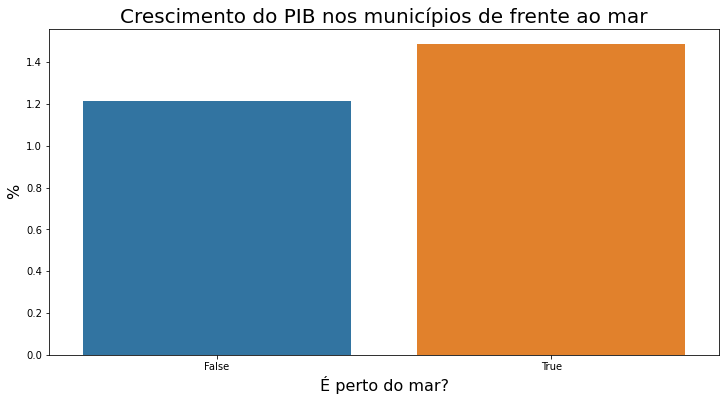

In [424]:
ax = sns.barplot(data=dados_2019_near_coast_growth_means, x='is_near_coast', y="total_gdp_1000_brl_growth_percent", orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento do PIB nos municípios de frente ao mar', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É perto do mar?', fontsize=16)
ax

<AxesSubplot:title={'center':'% Crescimento do PIB para cidades de frente com o mar'}, xlabel='É Defrontante com o mar?', ylabel='%'>

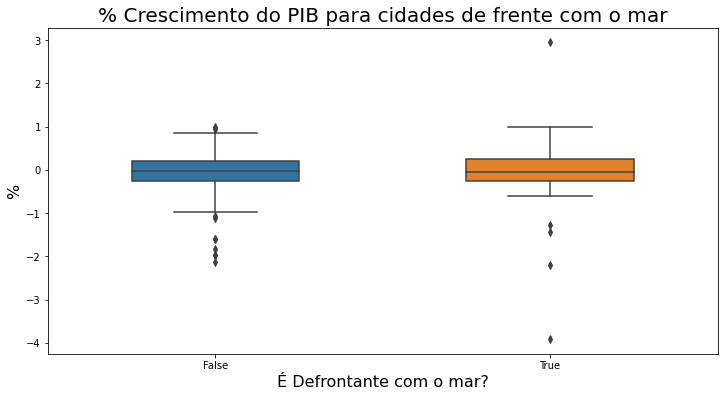

In [326]:
ax = sns.boxplot(y='total_gdp_1000_brl_growth_percent_log', x='is_sea_front', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('% Crescimento do PIB para cidades de frente com o mar', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É Defrontante com o mar?', fontsize=16)
ax

<AxesSubplot:title={'center':'% Crescimento do PIB região costeira'}, xlabel='É Região costeira?', ylabel='%'>

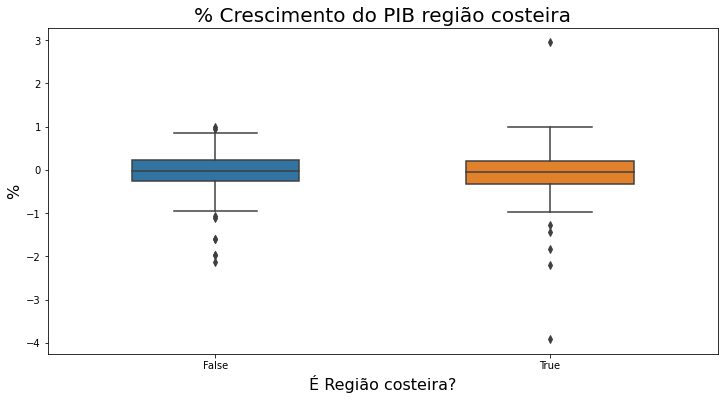

In [325]:
ax = sns.boxplot(y='total_gdp_1000_brl_growth_percent_log', x='is_near_coast', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('% Crescimento do PIB região costeira', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É Região costeira?', fontsize=16)
ax

<AxesSubplot:title={'center':'% Crescimento populacional região costeira'}, xlabel='É região costeira?', ylabel='%'>

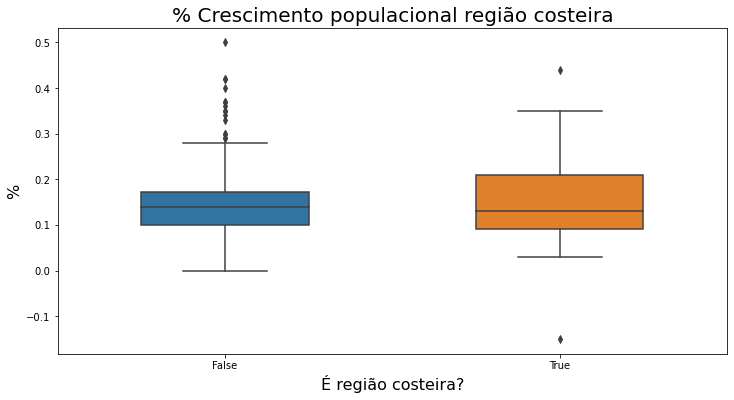

In [327]:
ax = sns.boxplot(y='population_growth_percent', x='is_near_coast', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('% Crescimento populacional região costeira', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É região costeira?', fontsize=16)
ax

<AxesSubplot:title={'center':'% Crescimento populacional municípios defrontantes com o mar'}, xlabel='É defrotante com o mar?', ylabel='%'>

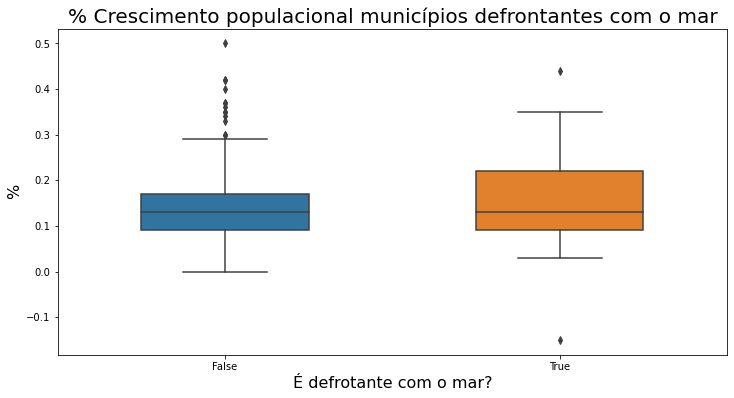

In [328]:
ax = sns.boxplot(y='population_growth_percent', x='is_sea_front', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('% Crescimento populacional municípios defrontantes com o mar', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É defrotante com o mar?', fontsize=16)
ax

## Conclusão

Existe uma **correlação forte entre o crescimento do PIB e populacional** nas cidades perto do mar. A **correlação com o PIB per capita também existe** mas é menor que a correlação com o crescimento.

---

## MATOPIBA

---

In [447]:
dados_2019_matopiba_gdp_population_growth = dados_2019[['is_matopiba', 'total_gdp_1000_brl_growth_percent', 'population_growth_percent', 'gdp_per_capita_brl']].copy()
dados_2019_matopiba_gdp_population_growth_means = dados_2019_matopiba_gdp_population_growth.groupby('is_matopiba', as_index=False).mean().sort_values(by=['population_growth_percent'], ascending=False)
dados_2019_matopiba_gdp_population_growth_means

,is_matopiba,total_gdp_1000_brl_growth_percent,population_growth_percent,gdp_per_capita_brl
1,True,1.513976,0.078368,17088.838279
0,False,1.217401,0.066964,25027.094074


<AxesSubplot:title={'center':'PIB per capita nos municípios MATOPIBA'}, xlabel='É MATOPIBA?', ylabel='R$'>

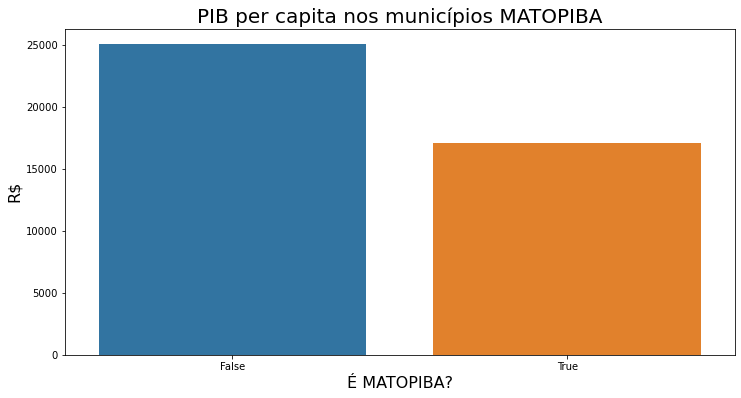

In [448]:
ax = sns.barplot(data=dados_2019_matopiba_gdp_population_growth_means, x='is_matopiba', y='gdp_per_capita_brl', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('PIB per capita nos municípios MATOPIBA', fontsize=20)
ax.set_ylabel('R$', fontsize=16)
ax.set_xlabel('É MATOPIBA?', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento do PIB nos municípios MATOPIBA'}, xlabel='É MATOPIBA?', ylabel='%'>

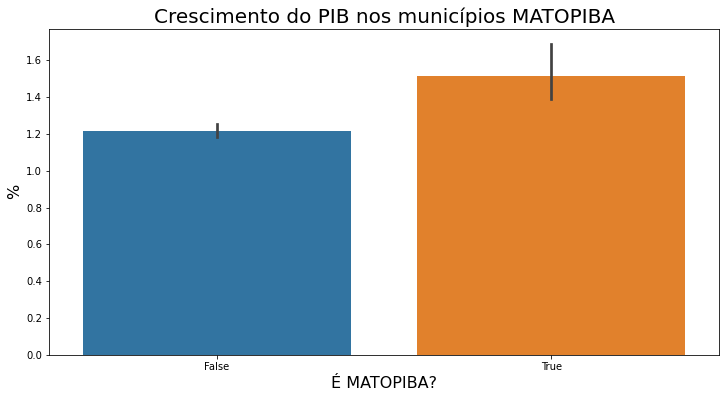

In [435]:
ax = sns.barplot(data=dados_2019_matopiba_gdp_population_growth_means, x='is_matopiba', y='total_gdp_1000_brl_growth_percent', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento do PIB nos municípios MATOPIBA', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É MATOPIBA?', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento populacional nos municípios MATOPIBA'}, xlabel='É MATOPIBA?', ylabel='%'>

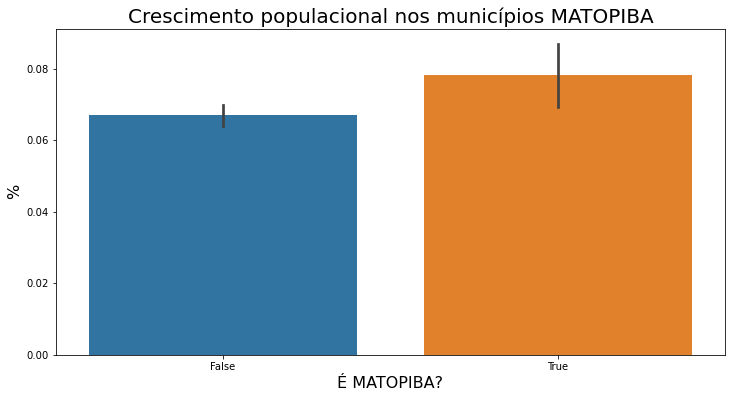

In [436]:
ax = sns.barplot(data=dados_2019_matopiba_gdp_population_growth_means, x='is_matopiba', y='population_growth_percent', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento populacional nos municípios MATOPIBA', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É MATOPIBA?', fontsize=16)
ax

<AxesSubplot:title={'center':'% Crescimento do PIB região MATOPIBA'}, xlabel='É MATOPIBA?', ylabel='%'>

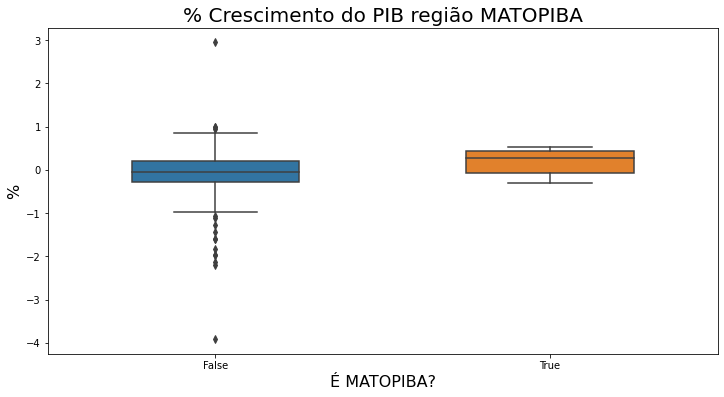

In [449]:
ax = sns.boxplot(y='total_gdp_1000_brl_growth_percent_log', x='is_matopiba', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('% Crescimento do PIB região MATOPIBA', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É MATOPIBA?', fontsize=16)
ax

<AxesSubplot:title={'center':'% Crescimento populacional região MATOPIBA'}, xlabel='É MATOPIBA?', ylabel='%'>

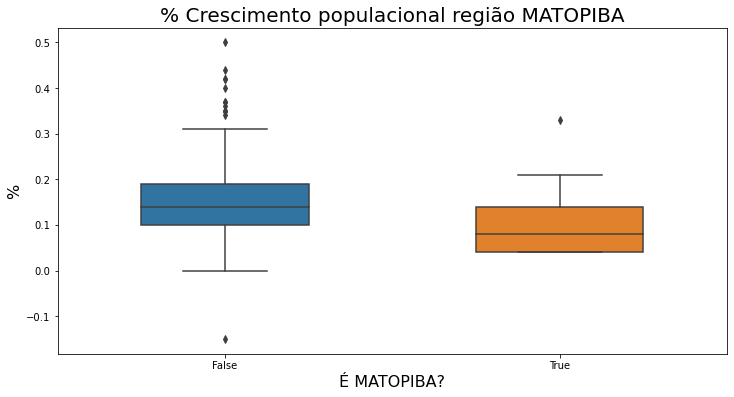

In [331]:
ax = sns.boxplot(y='population_growth_percent', x='is_matopiba', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('% Crescimento populacional região MATOPIBA', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É MATOPIBA?', fontsize=16)
ax

In [454]:
dados_2019_matopiba_gdp_population_growth_100k = dados_2019_100k_cities[['is_matopiba', 'total_gdp_1000_brl_growth_percent', 'population_growth_percent', 'gdp_per_capita_brl']].copy()
dados_2019_matopiba_gdp_population_growth_100k_means = dados_2019_matopiba_gdp_population_growth_100k.groupby('is_matopiba', as_index=False).mean().sort_values(by=['population_growth_percent'], ascending=False)
dados_2019_matopiba_gdp_population_growth_100k_means

,is_matopiba,total_gdp_1000_brl_growth_percent,population_growth_percent,gdp_per_capita_brl
0,False,1.062776,0.147792,38032.032461
1,True,1.223333,0.114444,20753.098889


<AxesSubplot:title={'center':'Crescimento do PIB nos municípios MATOPIBA com mais de 100 mil hab.'}, xlabel='É MATOPIBA?', ylabel='%'>

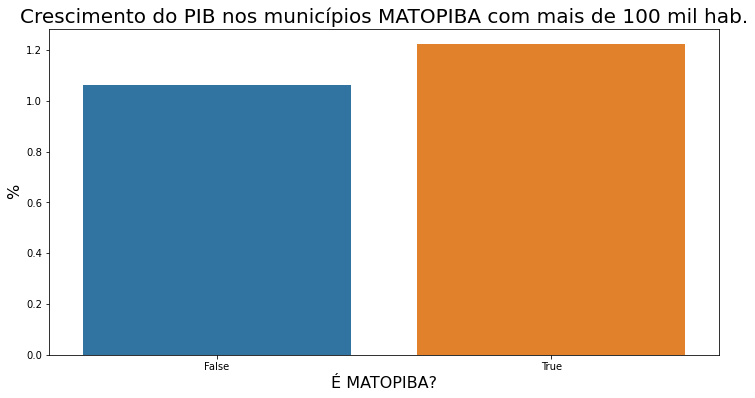

In [455]:
ax = sns.barplot(data=dados_2019_matopiba_gdp_population_growth_100k_means, x='is_matopiba', y='total_gdp_1000_brl_growth_percent', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento do PIB nos municípios MATOPIBA com mais de 100 mil hab.', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É MATOPIBA?', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento populacional nos municípios MATOPIBA com mais de 100 mil hab.'}, xlabel='É MATOPIBA?', ylabel='%'>

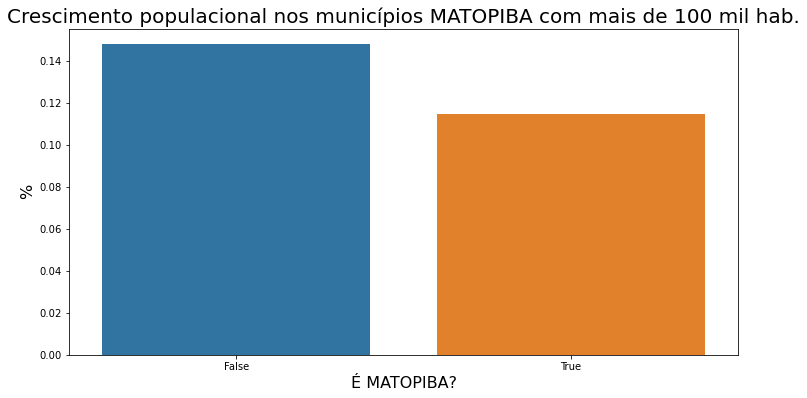

In [456]:
ax = sns.barplot(data=dados_2019_matopiba_gdp_population_growth_100k_means, x='is_matopiba', y='population_growth_percent', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento populacional nos municípios MATOPIBA com mais de 100 mil hab.', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É MATOPIBA?', fontsize=16)
ax

## Conclusão

Existe um **maior do crescimento populacional e do PIB** nas regiões MATOPIBA.
Porém essa região apresenta um **PIB per capita menor**.
Além disso existe uma diferença entre os municípios pequenos e maiores, A correlaçao do **crescimento populacional em cidades com mais de 100 mil hab. não é mais positiva**, apenas o crescimento do PIB.

---

## Amazônia Legal

---


In [305]:
dados_2019_legal_amazon_population_growth = dados_2019[['is_legal_amazon', 'total_gdp_1000_brl_growth_percent', 'population_growth_percent']].copy()
dados_2019_legal_amazon_population_growth.groupby('is_legal_amazon').mean().sort_values(by=['population_growth_percent'], ascending=False).head()

,total_gdp_1000_brl_growth_percent,population_growth_percent
is_legal_amazon,,
True,1.509520,0.119209
False,1.191268,0.059364


<AxesSubplot:title={'center':'PIB per capita em reais(R$)'}, xlabel='É amazônia legal?', ylabel='R$'>

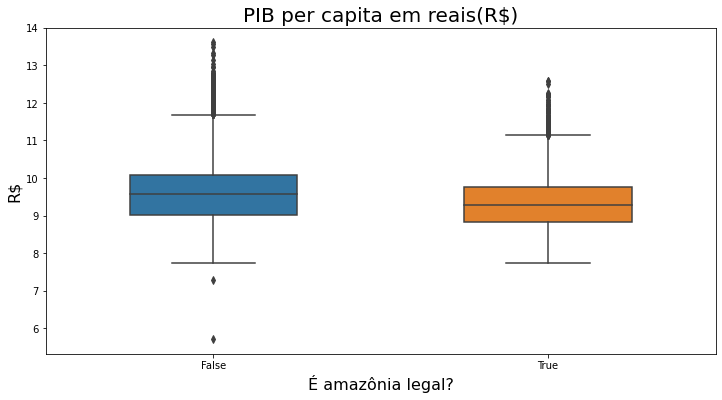

In [335]:
ax = sns.boxplot(y='log_gdp_per_capita', x='is_legal_amazon', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('PIB per capita em reais(R$)', fontsize=20)
ax.set_ylabel('R$', fontsize=16)
ax.set_xlabel('É amazônia legal?', fontsize=16)
ax

<AxesSubplot:title={'center':'% Crescimento populacional Amazônia Legal'}, xlabel='É amazônia legal?', ylabel='%'>

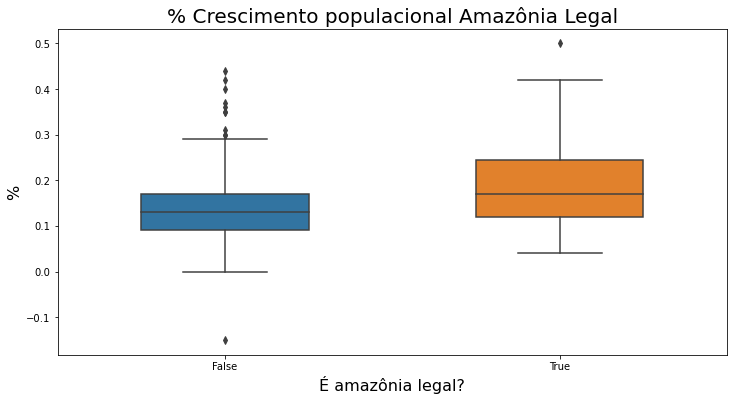

In [332]:
ax = sns.boxplot(y='population_growth_percent', x='is_legal_amazon', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('% Crescimento populacional Amazônia Legal', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É amazônia legal?', fontsize=16)
ax

In [457]:
dados_2019_legal_amazon_growth = dados_2019[['is_legal_amazon', 'total_gdp_1000_brl_growth_percent', 'population_growth_percent', 'gdp_per_capita_brl']].copy()
dados_2019_legal_amazon_growth_means = dados_2019_legal_amazon_growth.groupby('is_legal_amazon', as_index=False).mean().sort_values(by=['population_growth_percent'], ascending=False)
dados_2019_legal_amazon_growth_means

,is_legal_amazon,total_gdp_1000_brl_growth_percent,population_growth_percent,gdp_per_capita_brl
1,True,1.509520,0.119209,20493.359482
0,False,1.191268,0.059364,25199.009644


<AxesSubplot:title={'center':'PIB per capita Amazônia legal'}, xlabel='É Amazônia legal?', ylabel='R$'>

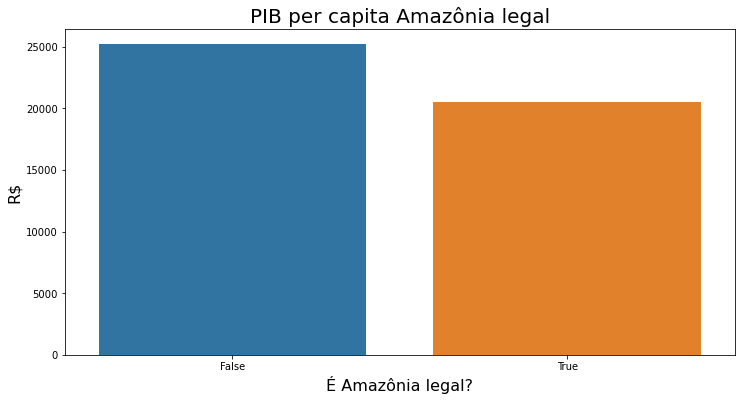

In [458]:
ax = sns.barplot(data=dados_2019_legal_amazon_growth_means, x='is_legal_amazon', y='gdp_per_capita_brl', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('PIB per capita Amazônia legal', fontsize=20)
ax.set_ylabel('R$', fontsize=16)
ax.set_xlabel('É Amazônia legal?', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento populacional Amazônia legal'}, xlabel='É Amazônia legal?', ylabel='%'>

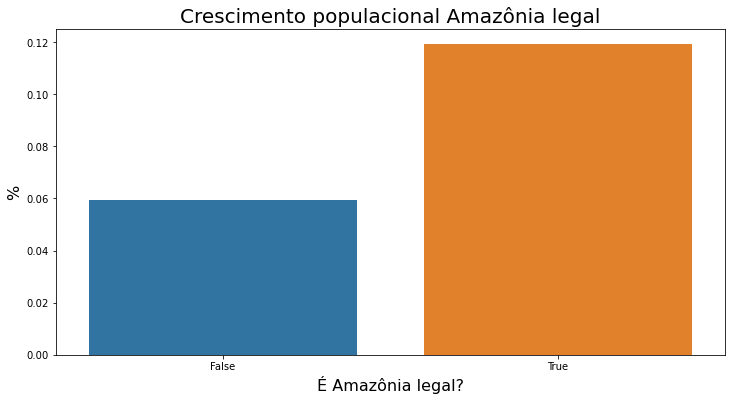

In [459]:
ax = sns.barplot(data=dados_2019_legal_amazon_growth_means, x='is_legal_amazon', y='population_growth_percent', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento populacional Amazônia legal', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É Amazônia legal?', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento do PIB Amazônia legal'}, xlabel='É Amazônia legal?', ylabel='%'>

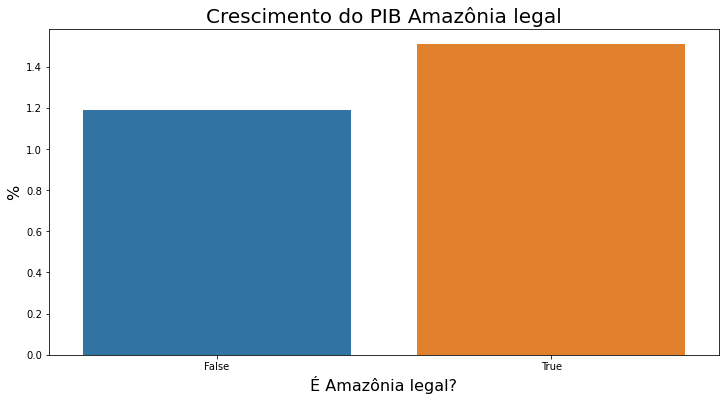

In [460]:
ax = sns.barplot(data=dados_2019_legal_amazon_growth_means, x='is_legal_amazon', y='total_gdp_1000_brl_growth_percent', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento do PIB Amazônia legal', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É Amazônia legal?', fontsize=16)
ax

## Conclusão

A região da amazônia legal tem um **PIB per capita menor**, enquanto tem um crescimento populacional e do PIB maior, com destaque para o **crescimento populacional bastante acima da média**.

---

## Semi Árido

---


In [462]:
dados_2019_semi_arid_growth = dados_2019[['is_semi_arid', 'total_gdp_1000_brl_growth_percent', 'population_growth_percent', 'gdp_per_capita_brl']].copy()
dados_2019_semi_arid_growth_means = dados_2019_semi_arid_growth.groupby('is_semi_arid', as_index=False).mean().sort_values(by=['population_growth_percent'], ascending=False)
dados_2019_semi_arid_growth_means

,is_semi_arid,total_gdp_1000_brl_growth_percent,population_growth_percent,gdp_per_capita_brl
0,False,1.217334,0.073500,28436.145975
1,True,1.296823,0.047726,11270.051450


<AxesSubplot:title={'center':'PIB per capital semi árido log(R$)'}, xlabel='É semi árido?', ylabel='log($)'>

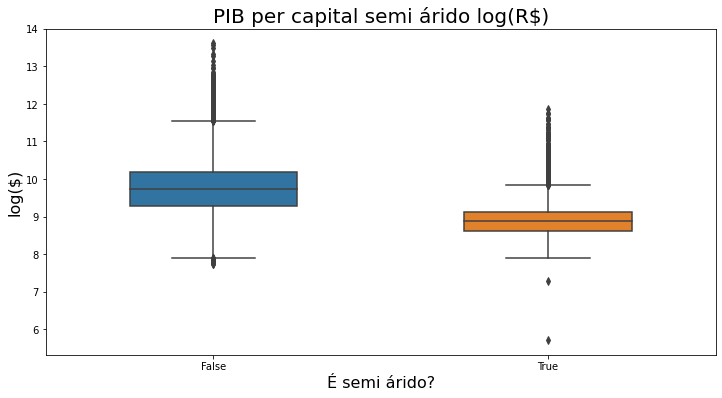

In [342]:
ax = sns.boxplot(y='log_gdp_per_capita', x='is_semi_arid', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('PIB per capital semi árido log(R$)', fontsize=20)
ax.set_ylabel('log($)', fontsize=16)
ax.set_xlabel('É semi árido?', fontsize=16)
ax

<AxesSubplot:title={'center':'log(%) Crescimento do PIB semi árido'}, xlabel='É semi árido?', ylabel='log(%)'>

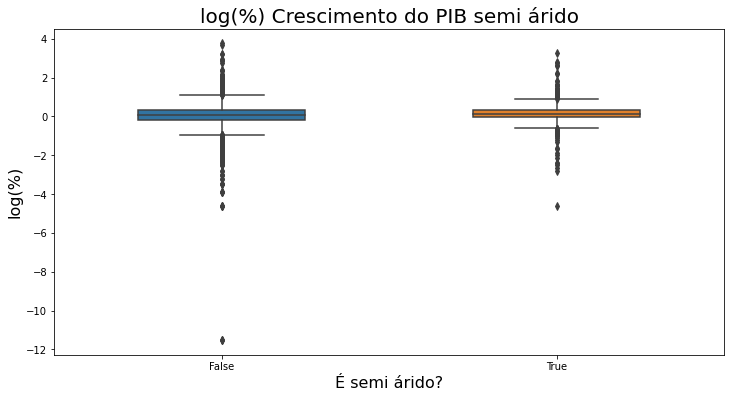

In [339]:
ax = sns.boxplot(y='total_gdp_1000_brl_growth_percent_log', x='is_semi_arid', data=dados_2019, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('log(%) Crescimento do PIB semi árido', fontsize=20)
ax.set_ylabel('log(%)', fontsize=16)
ax.set_xlabel('É semi árido?', fontsize=16)
ax

<AxesSubplot:title={'center':'% Crescimento populacional semi árido'}, xlabel='É semi árido?', ylabel='%'>

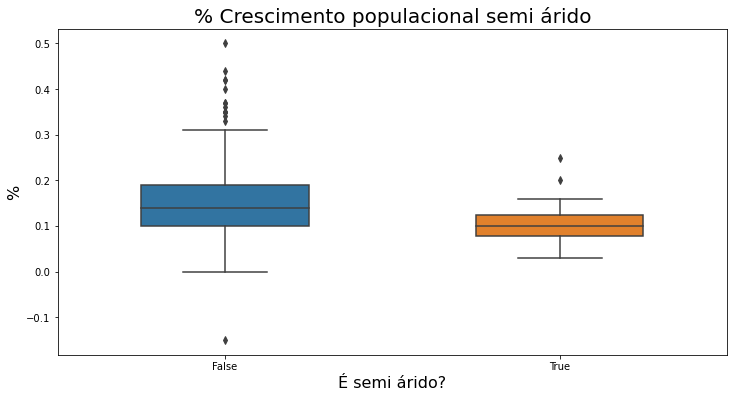

In [336]:
ax = sns.boxplot(y='population_growth_percent', x='is_semi_arid', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('% Crescimento populacional semi árido', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É semi árido?', fontsize=16)
ax

<AxesSubplot:title={'center':'PIB per capita semi árido'}, xlabel='É semi árido?', ylabel='R$'>

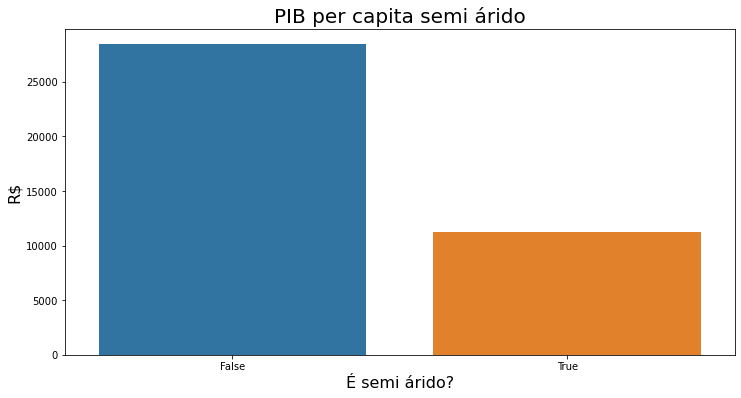

In [465]:
ax = sns.barplot(data=dados_2019_semi_arid_growth_means, x='is_semi_arid', y='gdp_per_capita_brl', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('PIB per capita semi árido', fontsize=20)
ax.set_ylabel('R$', fontsize=16)
ax.set_xlabel('É semi árido?', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento populacional semi árido'}, xlabel='É semi árido?', ylabel='%'>

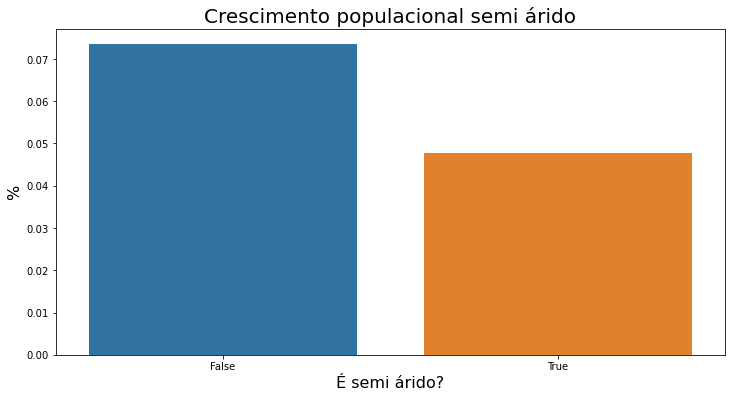

In [466]:
ax = sns.barplot(data=dados_2019_semi_arid_growth_means, x='is_semi_arid', y='population_growth_percent', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento populacional semi árido', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É semi árido?', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento PIB semi árido'}, xlabel='É semi árido?', ylabel='%'>

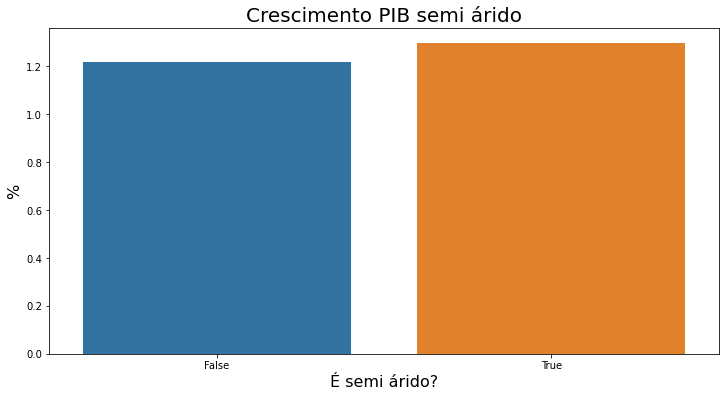

In [467]:
ax = sns.barplot(data=dados_2019_semi_arid_growth_means, x='is_semi_arid', y='total_gdp_1000_brl_growth_percent', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento PIB semi árido', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É semi árido?', fontsize=16)
ax

## Conclusão

A região do semi árido tem um **PIB per capita significativamente menor** que a média. O **crescimento populacional está abaixo do média**. O crescimento do PIB está ligeiramente maior que a média. No geral é possível afirmar que o semi árido tem uma **correlação negativa com o desenvolvimento socioeconomico** até os dias de hoje.

---


## São Paulo

---

### São Paulo Capital

---

In [484]:
dados_2019_with_is_sp_col = dados_2019[['city_id', 'total_gdp_1000_brl_growth_percent', 'population_growth_percent', 'gdp_per_capita_brl', 'gdp_per_capita_brl_growth_percent']].copy()
dados_2019_with_is_sp_col['is_sao_paulo'] = [True if x == 3550308 else False for x in dados_2019_with_sp_col['city_id']]

dados_2019_sao_paulo_growth_means = dados_2019_with_is_sp_col.groupby('is_sao_paulo', as_index=False).mean().sort_values(by=['population_growth_percent'], ascending=False)
dados_2019_sao_paulo_growth_means

,is_sao_paulo,city_id,total_gdp_1000_brl_growth_percent,population_growth_percent,gdp_per_capita_brl,gdp_per_capita_brl_growth_percent
1,True,3.550308e+06,0.700000,0.100000,62341.210000,0.560000
0,False,3.253537e+06,1.235457,0.067649,24540.021652,1.111204


<AxesSubplot:title={'center':'PIB per capita São Paulo'}, xlabel='É São Paulo?', ylabel='R$'>

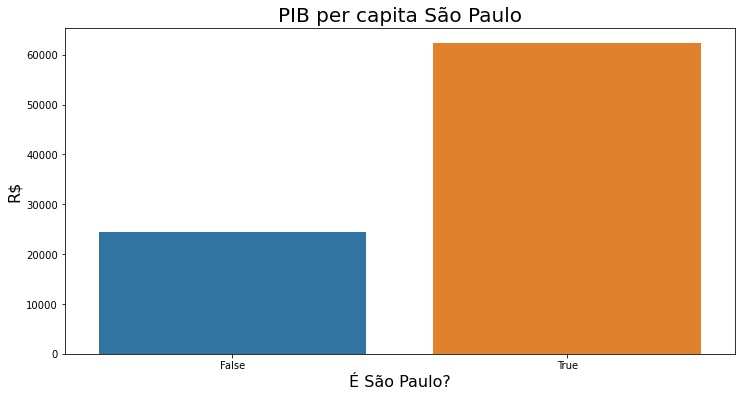

In [481]:
ax = sns.barplot(data=dados_2019_sao_paulo_growth_means, x='is_sao_paulo', y='gdp_per_capita_brl', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('PIB per capita São Paulo', fontsize=20)
ax.set_ylabel('R$', fontsize=16)
ax.set_xlabel('É São Paulo?', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento populacional São Paulo'}, xlabel='É São Paulo?', ylabel='%'>

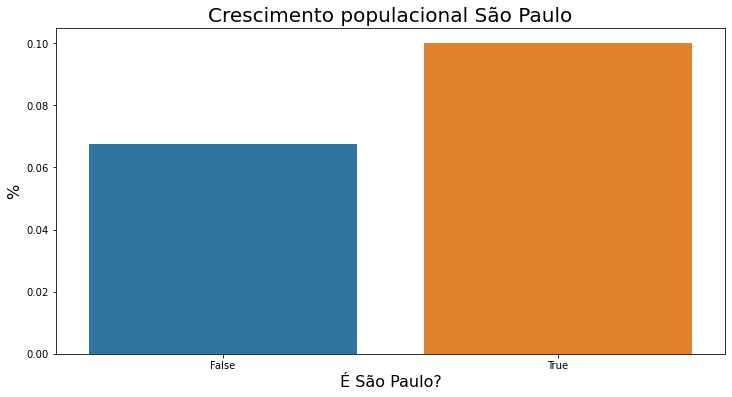

In [486]:
ax = sns.barplot(data=dados_2019_sao_paulo_growth_means, x='is_sao_paulo', y='population_growth_percent', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento populacional São Paulo', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É São Paulo?', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento do PIB São Paulo'}, xlabel='É São Paulo?', ylabel='R$'>

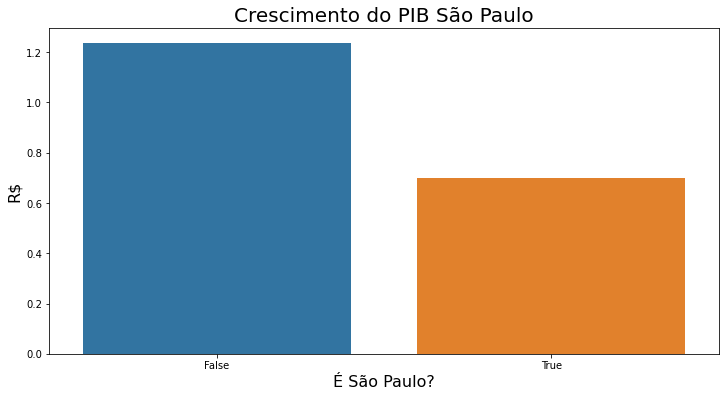

In [483]:
ax = sns.barplot(data=dados_2019_sao_paulo_growth_means, x='is_sao_paulo', y='total_gdp_1000_brl_growth_percent', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento do PIB São Paulo', fontsize=20)
ax.set_ylabel('R$', fontsize=16)
ax.set_xlabel('É São Paulo?', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento do PIB per capita São Paulo'}, xlabel='É São Paulo?', ylabel='R$'>

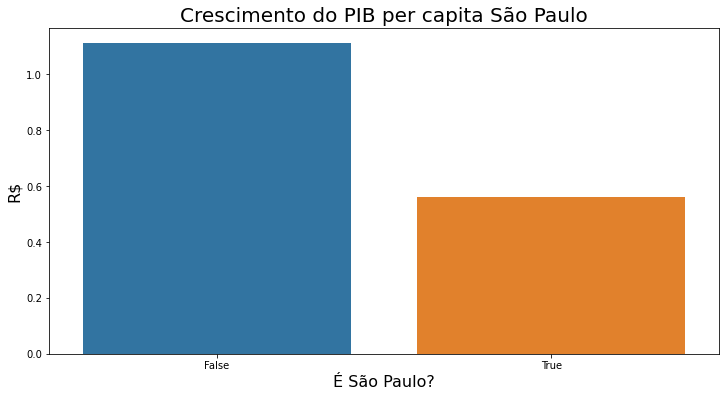

In [485]:
ax = sns.barplot(data=dados_2019_sao_paulo_growth_means, x='is_sao_paulo', y='gdp_per_capita_brl_growth_percent', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento do PIB per capita São Paulo', fontsize=20)
ax.set_ylabel('R$', fontsize=16)
ax.set_xlabel('É São Paulo?', fontsize=16)
ax

### Conclusão

A cidade de São Paulo tem um **PIB per capita que é mais que o dobro** do resto do país. O crescimento populacional está acima da média nacional já o crescimento do PIB está abaixo da média nacional. Indicando que a diferença do PIB per capita esta diminuindo.

---

### Região metropolitana de São Paulo

---

In [503]:
print('Quantidade de cidades na região: ', len(dados_2019.query('is_sao_paulo_region == True')), 'cidades')

Quantidade de cidades na região:  92 cidades


In [487]:
dados_2019_sp_region_growth = dados_2019[['is_sao_paulo_region', 'total_gdp_1000_brl_growth_percent', 'population_growth_percent', 'gdp_per_capita_brl']].copy()
dados_2019_sp_region_growth_means = dados_2019_sp_region_growth.groupby('is_sao_paulo_region', as_index=False).mean().sort_values(by=['population_growth_percent'], ascending=False)
dados_2019_sp_region_growth_means

,is_sao_paulo_region,total_gdp_1000_brl_growth_percent,population_growth_percent,gdp_per_capita_brl
1,True,0.976522,0.168043,57313.772935
0,False,1.239711,0.065967,23996.505053


<AxesSubplot:title={'center':'PIB per capita Região Metropolitana de São Paulo'}, xlabel='É Região de São Paulo?', ylabel='R$'>

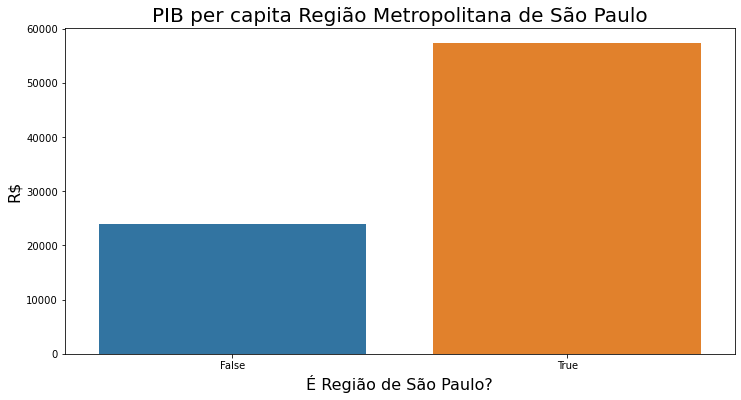

In [489]:
ax = sns.barplot(data=dados_2019_sp_region_growth_means, x='is_sao_paulo_region', y='gdp_per_capita_brl', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('PIB per capita Região Metropolitana de São Paulo', fontsize=20)
ax.set_ylabel('R$', fontsize=16)
ax.set_xlabel('É Região de São Paulo?', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento populacional Região Metropolitana de São Paulo'}, xlabel='É Região de São Paulo?', ylabel='%'>

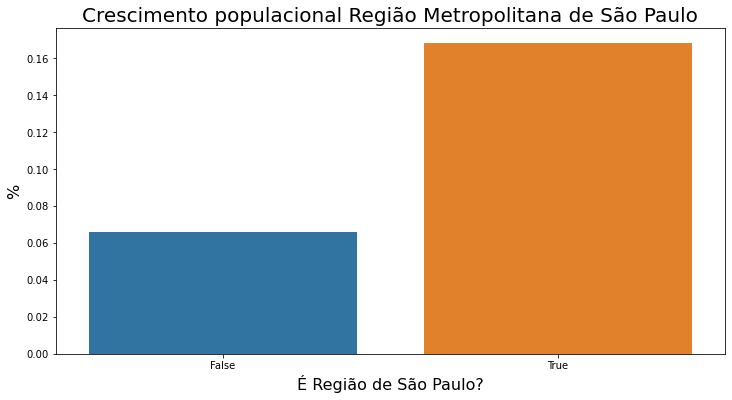

In [490]:
ax = sns.barplot(data=dados_2019_sp_region_growth_means, x='is_sao_paulo_region', y='population_growth_percent', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento populacional Região Metropolitana de São Paulo', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É Região de São Paulo?', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento do PIB Região Metropolitana de São Paulo'}, xlabel='É Região de São Paulo?', ylabel='%'>

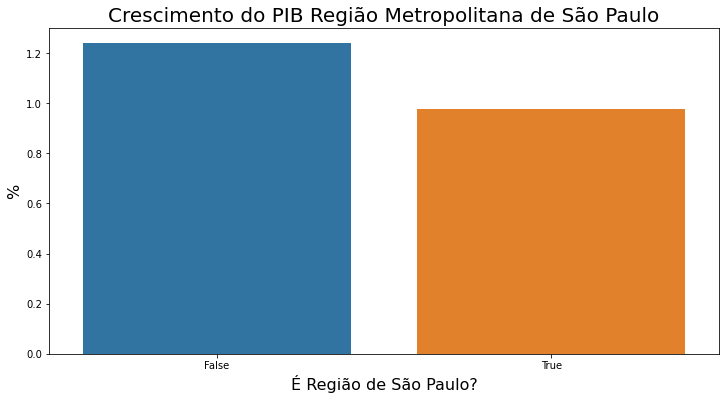

In [491]:
ax = sns.barplot(data=dados_2019_sp_region_growth_means, x='is_sao_paulo_region', y='total_gdp_1000_brl_growth_percent', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento do PIB Região Metropolitana de São Paulo', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É Região de São Paulo?', fontsize=16)
ax

### Conclusão

Na região metropolitana os indicadores são semelhantes aos encontrados para a cidade.
Se destaca a renda per capita um pouco melhor e que o crescimento do **PIB que está mais próximo da média nacional**.

---

## Capitais e Zonas metropolitanas

---

### Regiões metropolitanas

---

In [508]:
dados_2019_metropolitan_region_growth = dados_2019[['is_metropolitan_region', 'total_gdp_1000_brl_growth_percent', 'population_growth_percent', 'gdp_per_capita_brl']].copy()
dados_2019_metropolitan_region_growth_means = dados_2019_metropolitan_region_growth.groupby('is_metropolitan_region', as_index=False).mean().sort_values(by=['population_growth_percent'], ascending=False)
dados_2019_metropolitan_region_growth_means

,is_metropolitan_region,total_gdp_1000_brl_growth_percent,population_growth_percent,gdp_per_capita_brl
1,True,1.236325,0.089717,30403.337230
0,False,1.235031,0.060133,22544.781079


<AxesSubplot:title={'center':'PIB per capita Regiões Metropolitanas'}, xlabel='É Região metropolitana?', ylabel='%'>

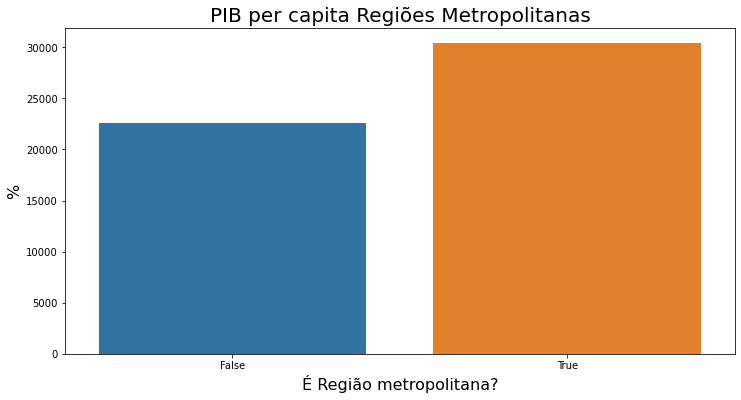

In [510]:
ax = sns.barplot(data=dados_2019_metropolitan_region_growth_means, x='is_metropolitan_region', y='gdp_per_capita_brl', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('PIB per capita Regiões Metropolitanas', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É Região metropolitana?', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento populacional Regiões Metropolitanas'}, xlabel='É Região metropolitana?', ylabel='%'>

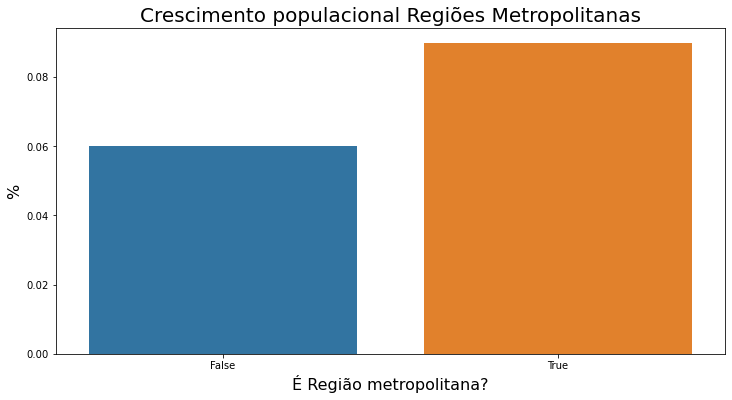

In [511]:
ax = sns.barplot(data=dados_2019_metropolitan_region_growth_means, x='is_metropolitan_region', y='population_growth_percent', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento populacional Regiões Metropolitanas', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É Região metropolitana?', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento PIB Regiões Metropolitanas'}, xlabel='É Região metropolitana?', ylabel='%'>

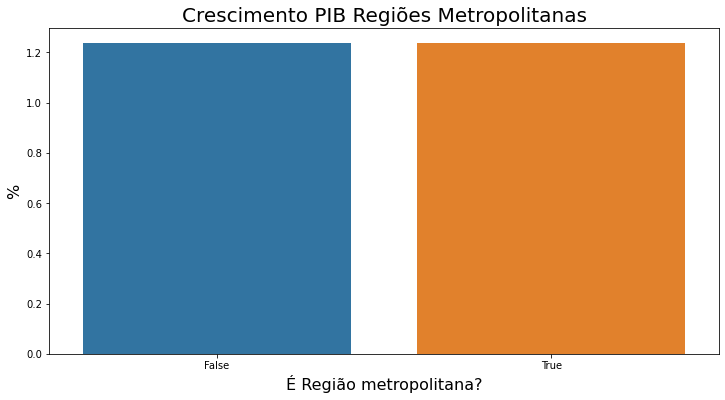

In [512]:
ax = sns.barplot(data=dados_2019_metropolitan_region_growth_means, x='is_metropolitan_region', y='total_gdp_1000_brl_growth_percent', orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento PIB Regiões Metropolitanas', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É Região metropolitana?', fontsize=16)
ax

In [516]:
metropolitan_regions_count = len(dados_2019['metropolitan_region'].unique())
print('Existem ', metropolitan_regions_count, 'regiões metropolitanas no país')

Existem  83 regiões metropolitanas no país


In [531]:
dados_2019_metropolitan_regions_growth = dados_2019.query('is_metropolitan_region == True')[['metropolitan_region', 'state_acronym', 'total_gdp_1000_brl_growth_percent', 'population_growth_percent', 'gdp_per_capita_brl']].copy()
dados_2019_metropolitan_regions_growth['state_and_metropolitan_region'] = dados_2019_metropolitan_regions_growth['state_acronym'] + '-' + dados_2019_metropolitan_regions_growth['metropolitan_region']
dados_2019_metropolitan_regions_growth_means = dados_2019_metropolitan_regions_growth.groupby('state_and_metropolitan_region', as_index=False).mean()
dados_2019_metropolitan_regions_growth_means.sort_values(by=['population_growth_percent'], ascending=False).head()

,state_and_metropolitan_region,total_gdp_1000_brl_growth_percent,population_growth_percent,gdp_per_capita_brl
64,SC-Região Metropolitana da Foz do Rio Itajaí,1.834444,0.362222,50030.412222
55,RO-Região Metropolitana de Porto Velho,1.185000,0.320000,27176.075000
57,RR-Região Metropolitana de Central,1.150000,0.305000,15409.245000
10,AP-Região Metropolitana de Macapá,0.993333,0.260000,17882.000000
58,RR-Região Metropolitana do Sul do Estado,1.722500,0.245000,20966.195000


### Conclusão

De forma **semelhante ao que acontece na região metropolitana de São Paulo**, as regiões metropolitanas do país tem PIB per capita e crescimento populacional maior que a média. O **crescimento do PIB por outro lado é praticamente identico à média nacional**.

---

### Capitais

---

In [307]:
dados_2019_capitals_population_growth = dados_2019[['is_capital', 'total_gdp_1000_brl_growth_percent', 'population_growth_percent']].copy()
dados_2019_capitals_population_growth.groupby('is_capital').mean().sort_values(by=['population_growth_percent'], ascending=False).head()

,total_gdp_1000_brl_growth_percent,population_growth_percent
is_capital,,
True,0.835185,0.153704
False,1.237311,0.067235


<AxesSubplot:title={'center':'% Crescimento populacional regiões metropolitanas'}, xlabel='É região metropolitana?', ylabel='%'>

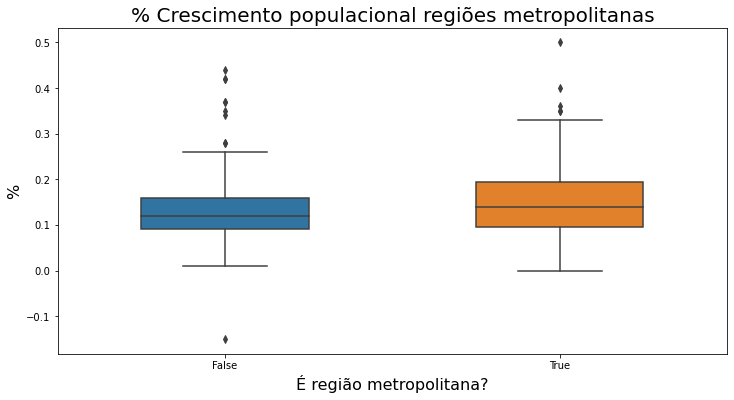

In [340]:
ax = sns.boxplot(y='population_growth_percent', x='is_metropolitan_region', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('% Crescimento populacional regiões metropolitanas', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É região metropolitana?', fontsize=16)
ax

<AxesSubplot:title={'center':'% Crescimento populacional nas capitais'}, xlabel='É capital?', ylabel='%'>

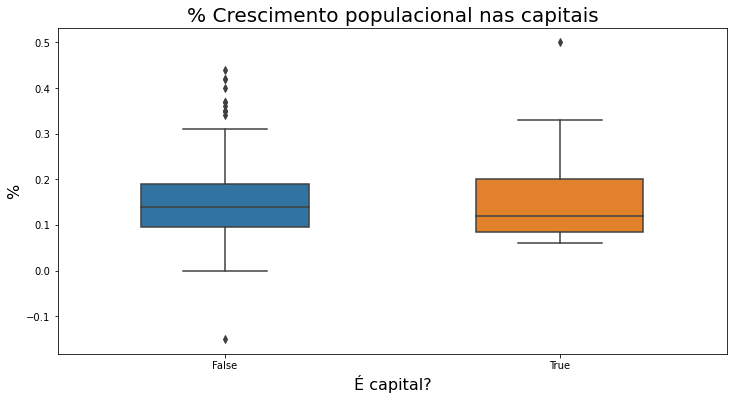

In [341]:
ax = sns.boxplot(y='population_growth_percent', x='is_capital', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('% Crescimento populacional nas capitais', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('É capital?', fontsize=16)
ax

## Distância do equador

---

In [430]:
dados_2019_distance_equator_category = dados_2019[['distance_equator_category', 'gdp_per_capita_brl', 'population_growth_percent', 'total_gdp_1000_brl_growth_percent', 'population2021']].copy()
dados_2019_distance_equator_category_means = dados_2019_distance_equator_category.groupby('distance_equator_category', as_index=False).mean().sort_values(by=['gdp_per_capita_brl'], ascending=False)
dados_2019_distance_equator_category_means

,distance_equator_category,gdp_per_capita_brl,population_growth_percent,total_gdp_1000_brl_growth_percent,population2021
5,Mais de 2500km,37169.551547,0.054617,1.237192,53595.053178
4,De 1500 à 2500km,25587.096380,0.064030,1.072563,30481.912413
3,De 1000 à 1500km,18181.116219,0.073591,1.329051,31648.553285
2,De 500 à 1000km,13462.667936,0.066760,1.376943,26778.926712
1,De 300 à 500km,12081.331227,0.112419,1.495487,53799.382671
0,Até 300km,11550.068171,0.137055,1.340184,58572.625767


<AxesSubplot:title={'center':'PIB per capita médio dos municípios por distancia do equador'}, xlabel='Distância do equador', ylabel='PIB per capita R$'>

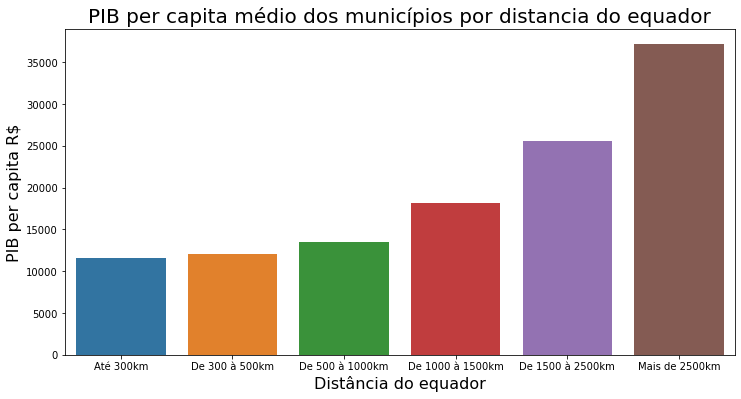

In [431]:
ax = sns.barplot(data=dados_2019_distance_equator_category_means, x='distance_equator_category', y="gdp_per_capita_brl", orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('PIB per capita médio dos municípios por distancia do equador', fontsize=20)
ax.set_ylabel('PIB per capita R$', fontsize=16)
ax.set_xlabel('Distância do equador', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento populacional dos municípios por distancia do equador'}, xlabel='Distância do equador', ylabel='Crescimento populacional'>

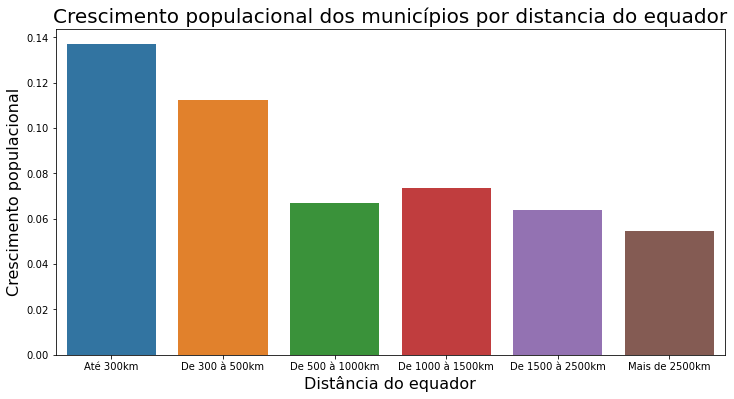

In [433]:
ax = sns.barplot(data=dados_2019_distance_equator_category_means, x='distance_equator_category', y="population_growth_percent", orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento populacional dos municípios por distancia do equador', fontsize=20)
ax.set_ylabel('Crescimento populacional', fontsize=16)
ax.set_xlabel('Distância do equador', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento do PIB total dos municípios por distancia do equador'}, xlabel='distance_equator_category', ylabel='total_gdp_1000_brl_growth_percent'>

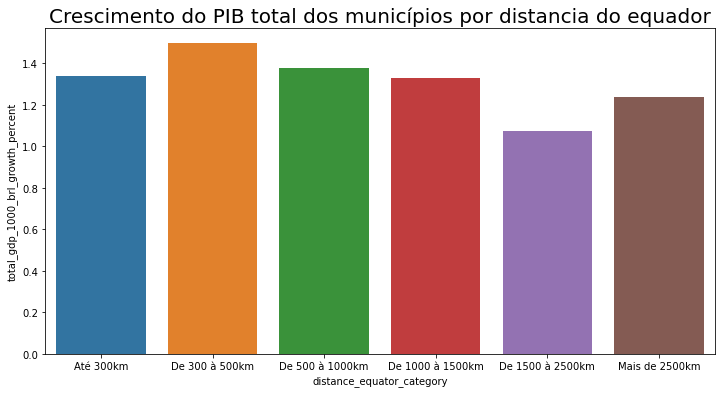

In [434]:
ax = sns.barplot(data=dados_2019_distance_equator_category_means, x='distance_equator_category', y="total_gdp_1000_brl_growth_percent", orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento do PIB total dos municípios por distancia do equador', fontsize=20)
ax

<AxesSubplot:title={'center':'log(%) Crescimento do PIB Distancia equador'}, xlabel='Distancia do equador', ylabel='%'>

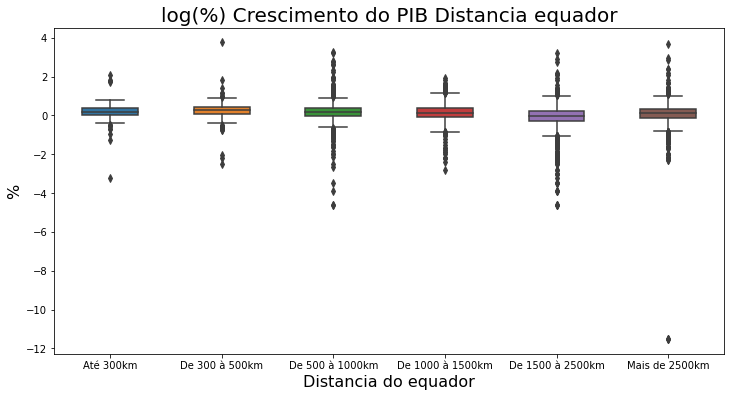

In [390]:
ax = sns.boxplot(y='total_gdp_1000_brl_growth_percent_log', x='distance_equator_category', data=dados_2019, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('log(%) Crescimento do PIB Distancia equador', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('Distancia do equador', fontsize=16)
ax

## Conclusão

A distância do equador e o **PIB per capita tem uma correlação forte** mas o crescimento do PIB não. Pode indicar que não existe mais uma relação de causalidade, apenas um fator histórico.
Ao mesmo tempo existe uma correlação razoavel entre o crescimento populacional e a distância do equador, já que paises perto do equador tiveram um **crescimento populacional maior que o resto**. Isso pode ter relação com a densidade populacional e taxa de natalidade do norte e nordeste.

---

## Estados e macro-regiões

---

In [301]:
dados_2019_states_gdp_population_growth = dados_2019[['state_acronym', 'total_gdp_1000_brl_growth_percent', 'population_growth_percent']].copy()
dados_2019_states_gdp_population_growth.groupby('state_acronym').mean().sort_values(by=['population_growth_percent'], ascending=False).head()

,total_gdp_1000_brl_growth_percent,population_growth_percent
state_acronym,,
AP,1.387500,0.310625
RR,1.452667,0.307333
AC,1.039545,0.241364
DF,0.900000,0.190000
AM,1.417903,0.174355


In [343]:
dados_2019_100k_cities = dados_2019_100k_cities.sort_values(by=['population_growth_percent'], ascending=False)
dados_2019_100k_cities.head(5)

,city_id,year,city_name,state_acronym,greater_region_name,greater_region_code,metropolitan_region,is_legal_amazon,is_semi_arid,is_sao_paulo_region,...,population_growth_percent,is_capital,distance_equator_km,population2021,is_matopiba,is_near_coast,is_sea_front,is_metropolitan_region,log_gdp_per_capita,total_gdp_1000_brl_growth_percent_log
50253,1400100,2019,Boa Vista,RR,Norte,1,Região Metropolitana da Capital,True,False,False,...,0.50,True,314,436591.0,False,False,False,True,10.184222,0.058278
53356,3304524,2019,Rio das Ostras,RJ,Sudeste,3,,False,False,False,...,0.44,False,2506,159529.0,False,True,True,False,10.846989,NaN
52883,3145208,2019,Nova Serrana,MG,Sudeste,3,,False,False,False,...,0.42,False,2212,108241.0,False,False,False,False,10.127135,0.431789
50385,1507300,2019,São Félix do Xingu,PA,Norte,1,,True,False,False,...,0.42,False,739,135732.0,False,False,False,False,9.331519,0.657525
55661,5220454,2019,Senador Canedo,GO,Centro-oeste,5,Região Metropolitana de Goiânia,False,False,False,...,0.40,False,1859,121447.0,False,False,False,True,10.390286,1.000636


In [344]:
dados_2019_100k_cities = dados_2019_100k_cities.sort_values(by=['total_gdp_1000_brl_growth_percent'], ascending=False)
dados_2019_100k_cities.head(5)

,city_id,year,city_name,state_acronym,greater_region_name,greater_region_code,metropolitan_region,is_legal_amazon,is_semi_arid,is_sao_paulo_region,...,population_growth_percent,is_capital,distance_equator_km,population2021,is_matopiba,is_near_coast,is_sea_front,is_metropolitan_region,log_gdp_per_capita,total_gdp_1000_brl_growth_percent_log
53330,3302700,2019,Maricá,RJ,Sudeste,3,Região Metropolitana do Rio de Janeiro,False,False,False,...,0.28,False,2553,167668.0,False,True,True,True,12.357768,2.946017
55661,5220454,2019,Senador Canedo,GO,Centro-oeste,5,Região Metropolitana de Goiânia,False,False,False,...,0.40,False,1859,121447.0,False,False,False,True,10.390286,1.000636
53337,3303302,2019,Niterói,RJ,Sudeste,3,Região Metropolitana do Rio de Janeiro,False,False,False,...,0.06,False,2547,516981.0,False,True,True,True,11.414693,0.993255
54136,4107652,2019,Fazenda Rio Grande,PR,Sul,4,Região Metropolitana de Curitiba,False,False,False,...,0.25,False,2856,103750.0,False,False,False,True,10.127609,0.936097
53550,3515004,2019,Embu das Artes,SP,Sudeste,3,Região Metropolitana de São Paulo,False,False,True,...,0.15,False,2632,279264.0,False,False,False,True,10.893010,0.862894


<AxesSubplot:title={'center':'% Crescimento do PIB macro regiões'}, xlabel='Nome da macro região', ylabel='%'>

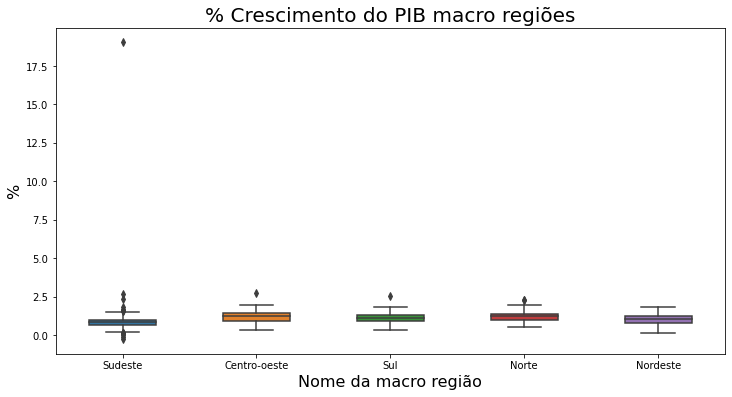

In [345]:
ax = sns.boxplot(y='total_gdp_1000_brl_growth_percent', x='greater_region_name', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('% Crescimento do PIB macro regiões', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('Nome da macro região', fontsize=16)
ax

<AxesSubplot:title={'center':'% Crescimento do PIB dos estados'}, xlabel='Estado', ylabel='%'>

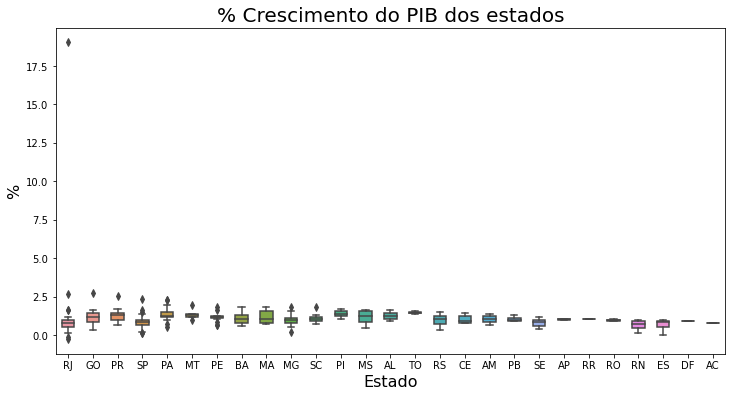

In [346]:
ax = sns.boxplot(y='total_gdp_1000_brl_growth_percent', x='state_acronym', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('% Crescimento do PIB dos estados', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('Estado', fontsize=16)
ax

<AxesSubplot:title={'center':'Crescimento populacional dos estados'}, xlabel='Estados', ylabel='%'>

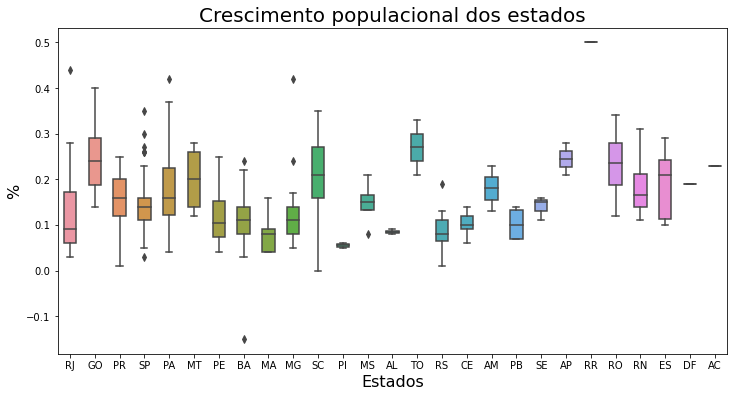

In [347]:
ax = sns.boxplot(y='population_growth_percent', x='state_acronym', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento populacional dos estados', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('Estados', fontsize=16)
ax


<AxesSubplot:title={'center':'Crescimento populacional macro região'}, xlabel='Macro região', ylabel='%'>

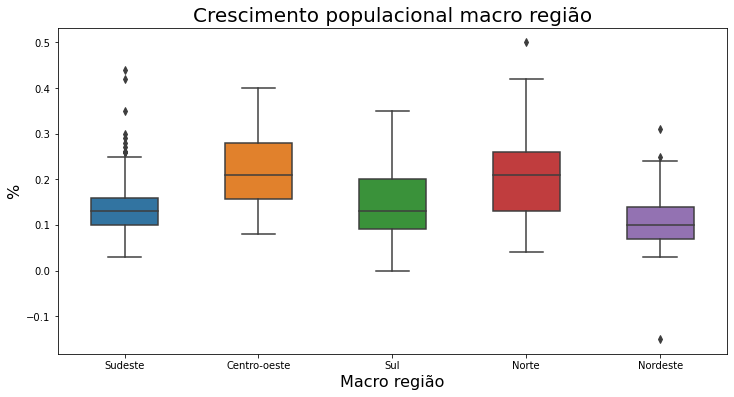

In [348]:
ax = sns.boxplot(y='population_growth_percent', x='greater_region_name', data=dados_2019_100k_cities, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Crescimento populacional macro região', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax.set_xlabel('Macro região', fontsize=16)
ax

## Análises gerais

---

<AxesSubplot:title={'center':'PIB per capita em reais'}, xlabel='Ano', ylabel='R$'>

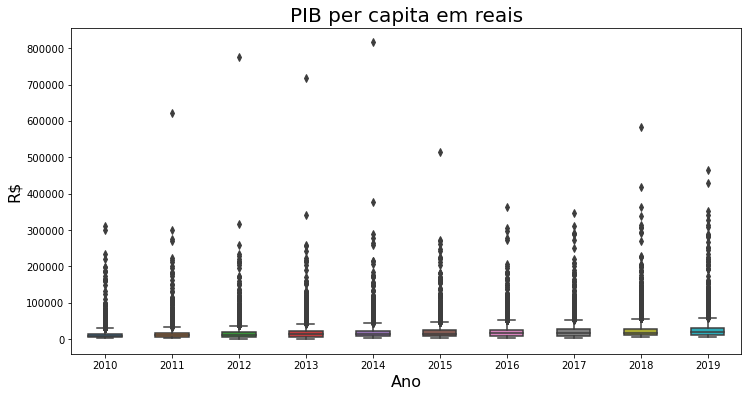

In [349]:
ax = sns.boxplot(y='gdp_per_capita_brl', x='year', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('PIB per capita em reais', fontsize=20)
ax.set_ylabel('R$', fontsize=16)
ax.set_xlabel('Ano', fontsize=16)
ax

In [316]:
dados_gdp_growth_corr = dados.corr()['total_gdp_1000_brl_growth_percent'].round(2)
dados_gdp_growth_corr.sort_values(ascending=False)

total_gdp_1000_brl_growth_percent        1.00
gdp_per_capita_brl_growth_percent        0.98
gdp_per_capita_brl_growth                0.68
total_gdp_1000_brl_growth_percent_log    0.57
gdp_per_capita_brl                       0.14
is_legal_amazon                          0.08
is_sea_front                             0.08
log_gdp_per_capita                       0.07
population_growth_percent                0.07
is_near_coast                            0.06
is_matopiba                              0.05
agro_value_1000_brl                      0.04
total_gdp_1000_brl_growth                0.04
is_semi_arid                             0.03
industry_value_1000_brl                  0.01
is_metropolitan_region                   0.00
year                                    -0.00
total_gdp_1000_brl                      -0.01
services_value_1000_brl                 -0.01
population2021                          -0.02
greater_region_code                     -0.02
is_capital                        

In [317]:
dados_gdp_per_capita_growth_corr = dados.corr()['gdp_per_capita_brl_growth_percent'].round(2)
dados_gdp_per_capita_growth_corr.sort_values(ascending=False)

gdp_per_capita_brl_growth_percent        1.00
total_gdp_1000_brl_growth_percent        0.98
gdp_per_capita_brl_growth                0.66
total_gdp_1000_brl_growth_percent_log    0.56
gdp_per_capita_brl                       0.11
is_legal_amazon                          0.06
is_sea_front                             0.05
is_matopiba                              0.05
is_semi_arid                             0.04
log_gdp_per_capita                       0.04
is_near_coast                            0.03
total_gdp_1000_brl_growth                0.03
agro_value_1000_brl                      0.02
year                                    -0.00
greater_region_code                     -0.01
industry_value_1000_brl                 -0.01
taxes_value_1000_brl                    -0.02
services_value_1000_brl                 -0.02
public_expending_value_1000_brl         -0.02
is_metropolitan_region                  -0.02
total_gdp_1000_brl                      -0.02
city_id                           

In [319]:
dados_population_growth_corr = dados.corr()['population_growth_percent'].round(2)
dados_population_growth_corr.sort_values(ascending=False)

population_growth_percent                1.00
is_legal_amazon                          0.19
population_growth                        0.17
is_near_coast                            0.17
gdp_per_capita_brl                       0.16
agro_value_1000_brl                      0.16
log_gdp_per_capita                       0.15
is_sea_front                             0.15
is_sao_paulo_region                      0.12
is_metropolitan_region                   0.12
industry_value_1000_brl                  0.11
total_gdp_1000_brl_growth_percent_log    0.08
population2021                           0.07
total_gdp_1000_brl_growth                0.07
total_gdp_1000_brl_growth_percent        0.07
total_gdp_1000_brl                       0.05
public_expending_value_1000_brl          0.05
is_capital                               0.05
services_value_1000_brl                  0.04
gdp_per_capita_brl_growth                0.04
taxes_value_1000_brl                     0.04
is_matopiba                       

C:\Users\plini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='gdp_per_capita_brl', ylabel='Gdp per capita'>

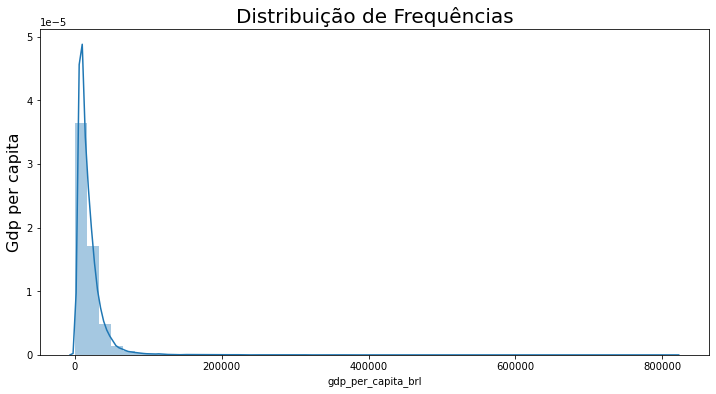

In [269]:
ax = sns.distplot(dados['gdp_per_capita_brl'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Gdp per capita', fontsize=16)
ax

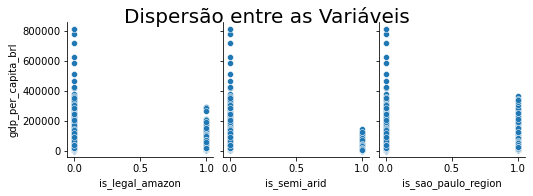

In [270]:
ax = sns.pairplot(dados, y_vars='gdp_per_capita_brl', x_vars=['is_legal_amazon', 'is_semi_arid', 'is_sao_paulo_region'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

C:\Users\plini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências Log'}, xlabel='log_gdp_per_capita', ylabel='Gdp per capita'>

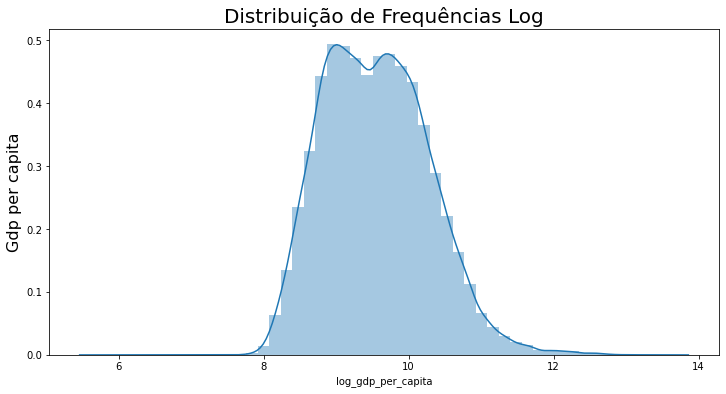

In [271]:
ax = sns.distplot(dados['log_gdp_per_capita'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências Log', fontsize=20)
ax.set_ylabel('Gdp per capita', fontsize=16)
ax

<AxesSubplot:title={'center':'Gdp per capita year log'}, xlabel='Year', ylabel='$$$'>

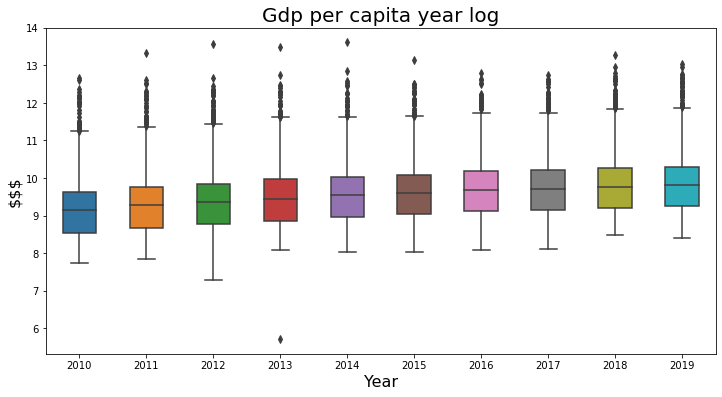

In [272]:
ax = sns.boxplot(y='log_gdp_per_capita', x='year', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Gdp per capita year log', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax

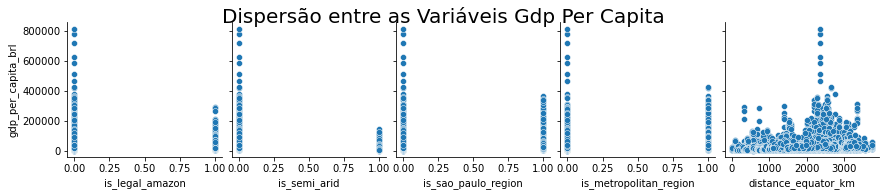

In [275]:
ax = sns.pairplot(dados, y_vars='gdp_per_capita_brl', x_vars=['is_legal_amazon', 'is_semi_arid', 'is_sao_paulo_region', 'is_metropolitan_region', 'distance_equator_km'])
ax.fig.suptitle('Dispersão entre as Variáveis Gdp Per Capita', fontsize=20, y=1.05)
ax

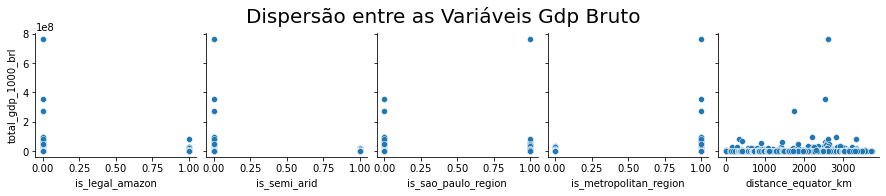

In [276]:
ax = sns.pairplot(dados_2019, y_vars='total_gdp_1000_brl', x_vars=['is_legal_amazon', 'is_semi_arid', 'is_sao_paulo_region', 'is_metropolitan_region', 'distance_equator_km'])
ax.fig.suptitle('Dispersão entre as Variáveis Gdp Bruto', fontsize=20, y=1.05)
ax

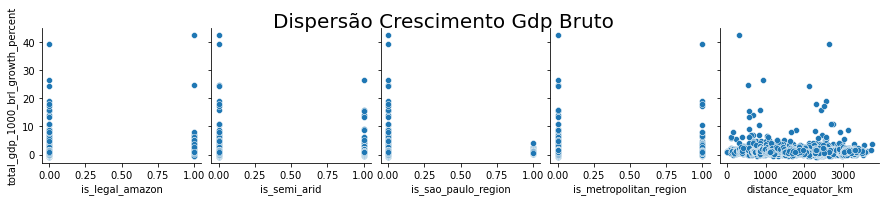

In [277]:
ax = sns.pairplot(dados_2019, y_vars='total_gdp_1000_brl_growth_percent', x_vars=['is_legal_amazon', 'is_semi_arid', 'is_sao_paulo_region', 'is_metropolitan_region', 'distance_equator_km'])
ax.fig.suptitle('Dispersão Crescimento Gdp Bruto', fontsize=20, y=1.05)
ax

C:\Users\plini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências Crescimento bruto %'}, xlabel='total_gdp_1000_brl_growth_percent', ylabel='total_gdp_1000_brl_growth_percent'>

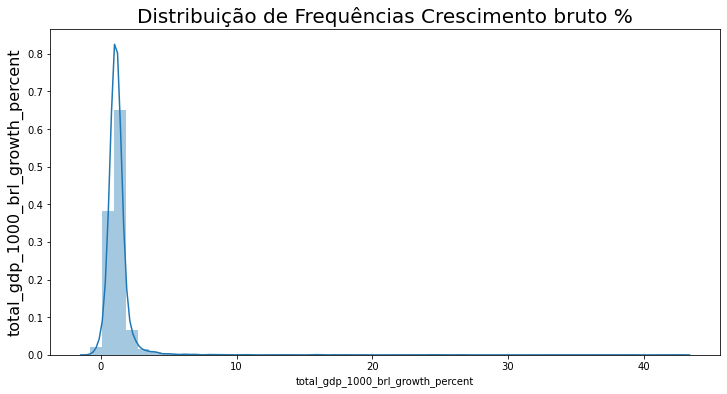

In [279]:
ax = sns.distplot(dados_2019['total_gdp_1000_brl_growth_percent'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências Crescimento bruto %', fontsize=20)
ax.set_ylabel('total_gdp_1000_brl_growth_percent', fontsize=16)
ax

C:\Users\plini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências Crescimento per capita %'}, xlabel='gdp_per_capita_brl_growth_percent', ylabel='gdp_per_capita_brl_growth_percent'>

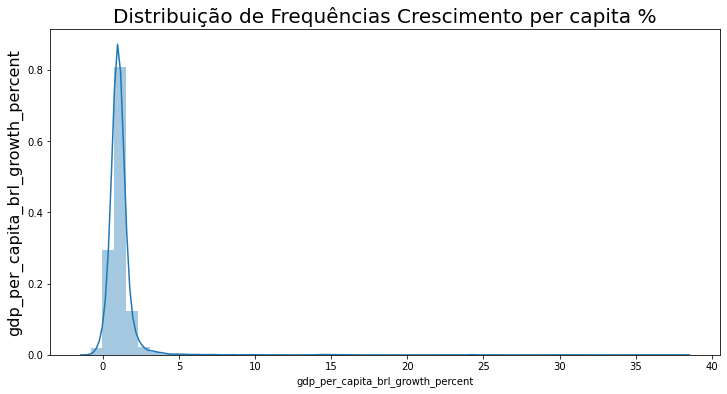

In [280]:
ax = sns.distplot(dados_2019['gdp_per_capita_brl_growth_percent'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências Crescimento per capita %', fontsize=20)
ax.set_ylabel('gdp_per_capita_brl_growth_percent', fontsize=16)
ax

C:\Users\plini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências Crescimento per capita % +100mil hab.'}, xlabel='gdp_per_capita_brl_growth_percent', ylabel='gdp_per_capita_brl_growth_percent'>

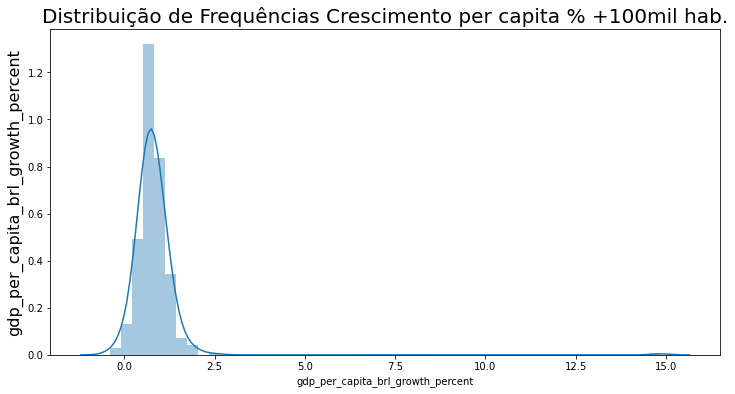

In [281]:
ax = sns.distplot(dados_2019_100k_cities['gdp_per_capita_brl_growth_percent'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências Crescimento per capita % +100mil hab.', fontsize=20)
ax.set_ylabel('gdp_per_capita_brl_growth_percent', fontsize=16)
ax

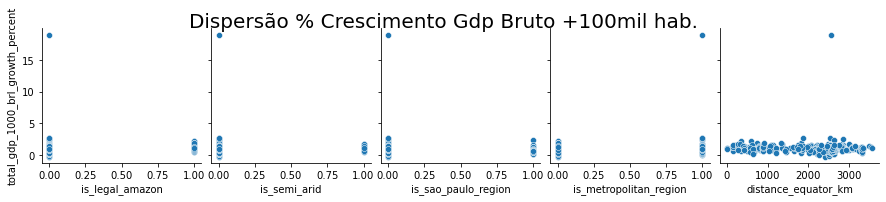

In [282]:
ax = sns.pairplot(dados_2019_100k_cities, y_vars='total_gdp_1000_brl_growth_percent', x_vars=['is_legal_amazon', 'is_semi_arid', 'is_sao_paulo_region', 'is_metropolitan_region', 'distance_equator_km'])
ax.fig.suptitle('Dispersão % Crescimento Gdp Bruto +100mil hab.', fontsize=20, y=1.05)
ax

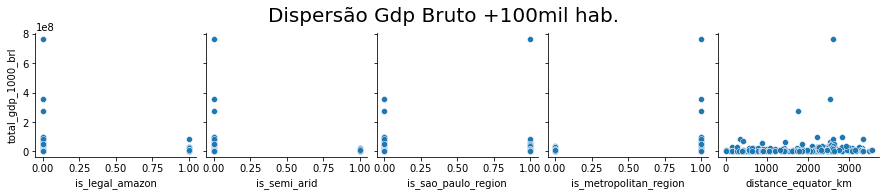

In [283]:
ax = sns.pairplot(dados_2019_100k_cities, y_vars='total_gdp_1000_brl', x_vars=['is_legal_amazon', 'is_semi_arid', 'is_sao_paulo_region', 'is_metropolitan_region', 'distance_equator_km'])
ax.fig.suptitle('Dispersão Gdp Bruto +100mil hab.', fontsize=20, y=1.05)
ax

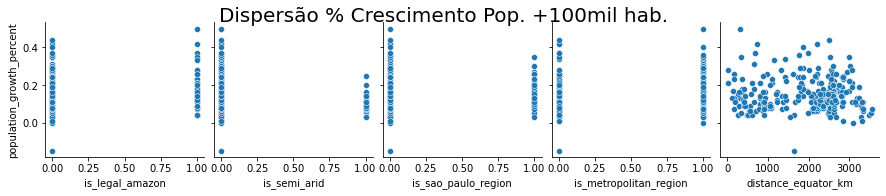

In [284]:
ax = sns.pairplot(dados_2019_100k_cities, y_vars='population_growth_percent', x_vars=['is_legal_amazon', 'is_semi_arid', 'is_sao_paulo_region', 'is_metropolitan_region', 'distance_equator_km'])
ax.fig.suptitle('Dispersão % Crescimento Pop. +100mil hab.', fontsize=20, y=1.05)
ax